In [149]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.mixture import GaussianMixture         
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
#from sklearn.cluster import Birch


import warnings
warnings.filterwarnings('ignore')

In [150]:
Data=pd.read_csv(r'H:\Machine_Lerning_AM\Data\Customer_Data.csv')
df=pd.DataFrame(Data)
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [151]:
df.drop('CUST_ID', axis=1, inplace=True)



                                                    DATA preparation
                                                    

In [152]:
df.dropna()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8943     5.871712           0.500000      20.90             20.90   
8945    28.493517           1.000000     291.12              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
4      678.334763        244.791237          0.000000      12  
5     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8943    58.644883         43.473717          0.000000       6  
8945   325.594462         48.886365          0.500000       6  
8947    81

In [153]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [154]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [155]:
df.dropna(inplace=True)
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8636.000000        8636.000000   8636.000000       8636.000000   
mean    1601.224893           0.895035   1025.433874        604.901438   
std     2095.571300           0.207697   2167.107984       1684.307803   
min        0.000000           0.000000      0.000000          0.000000   
25%      148.095189           0.909091     43.367500          0.000000   
50%      916.855459           1.000000    375.405000         44.995000   
75%     2105.195853           1.000000   1145.980000        599.100000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8636.000000   8636.000000          8636.000000   
mean               420.843533    994.175523             0.496000   
std                917.245182   2121.458303             0.401273   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 94.785000      0.000000             0.500000   
75%                484.147500   1132.385490             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8636.000000                       8636.000000   
mean                     0.205909                          0.368820   
std                      0.300054                          0.398093   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8636.000000       8636.000000    8636.000000   8636.000000   
mean                 0.137604          3.313918      15.033233   4522.091030   
std                  0.201791          6.912506      25.180468   3659.240379   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.250000          4.000000      18.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8636.000000       8636.000000       8636.000000  8636.000000  
mean    1784.478099        864.304943          0.159304    11.534391  
std     2909.810090       2372.566350          0.296271     1.310984  
min        0.049513          0.019163          0.000000     6.000000  
25%      418.559237        169.163545          0.000000    12.000000  
50%      896.675701        312.452292          0.000000    12.000000  
75%     1951.142090        825.496463          0.166667    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [156]:
#Check the types of columns
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

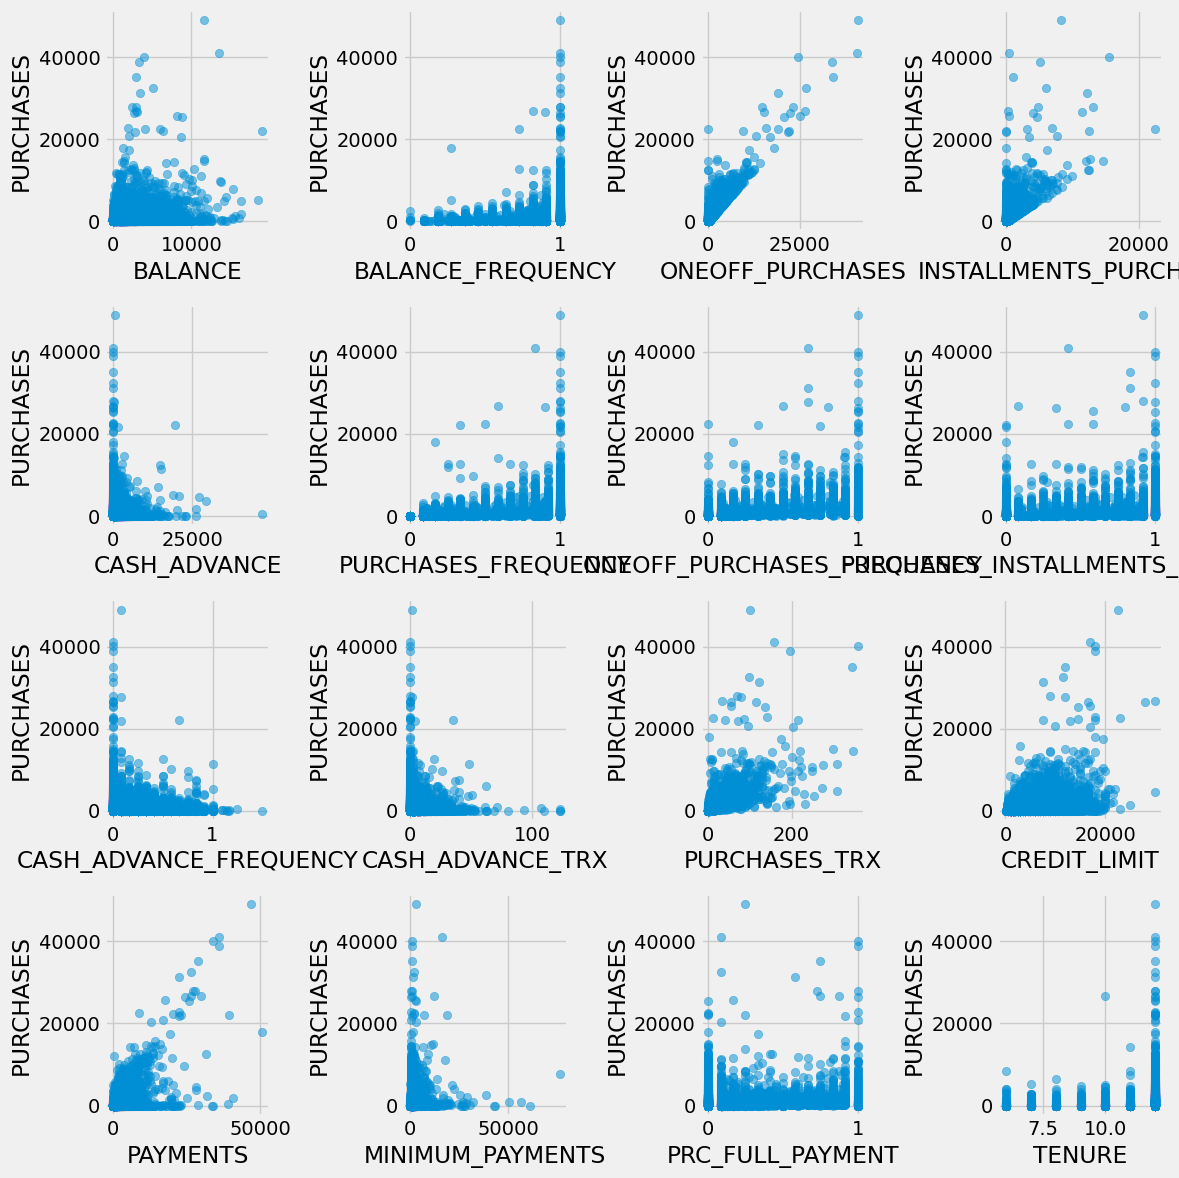

In [157]:

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Iterate over each column (excluding 'PURCHASES')
for i, column in enumerate(df.columns[df.columns != 'PURCHASES']):
    # Plot the 'PURCHASES' column against the current column
    axs[i].scatter(df[column], df['PURCHASES'], alpha=0.5)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('PURCHASES')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

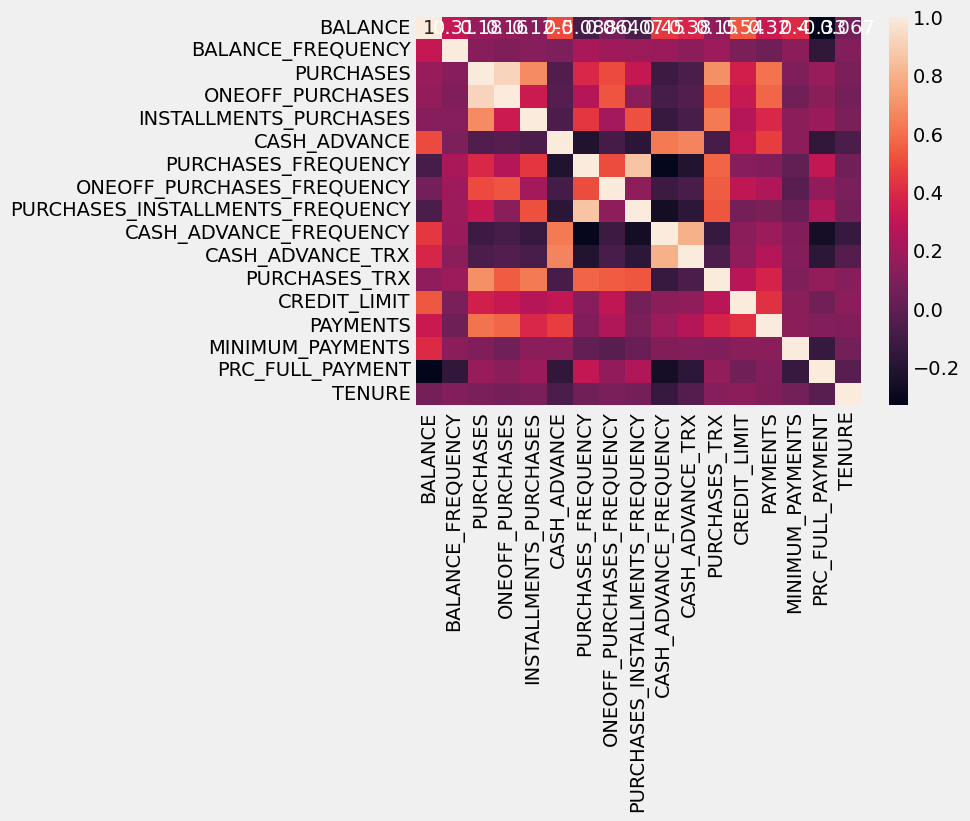

In [158]:

# Calculate correlation matrix

correlation_matrix = df.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True)  # Annotate with correlation values
plt.show()

In [159]:
correlation_matrix=pd.DataFrame(correlation_matrix)
correlation_matrix

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.310140   0.176083   
BALANCE_FREQUENCY                 0.310140           1.000000   0.122635   
PURCHASES                         0.176083           0.122635   1.000000   
ONEOFF_PURCHASES                  0.159985           0.095254   0.916780   
INSTALLMENTS_PURCHASES            0.122109           0.114739   0.679259   
CASH_ADVANCE                      0.495586           0.089036  -0.053760   
PURCHASES_FREQUENCY              -0.088459           0.228158   0.393000   
ONEOFF_PURCHASES_FREQUENCY        0.063832           0.187467   0.497384   
PURCHASES_INSTALLMENTS_FREQUENCY -0.069582           0.184159   0.316025   
CASH_ADVANCE_FREQUENCY            0.445307           0.181132  -0.124863   
CASH_ADVANCE_TRX                  0.382388           0.133265  -0.070277   
PURCHASES_TRX                     0.147887           0.183095   0.688732   
CREDIT_LIMIT                      0.535518           0.087682   0.358425   
PAYMENTS                          0.322830           0.039169   0.606782   
MINIMUM_PAYMENTS                  0.398669           0.132519   0.093842   
PRC_FULL_PAYMENT                 -0.333594          -0.156961   0.176447   
TENURE                            0.066987           0.104714   0.084545   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.159985                0.122109   
BALANCE_FREQUENCY                         0.095254                0.114739   
PURCHASES                                 0.916780                0.679259   
ONEOFF_PURCHASES                          1.000000                0.329650   
INSTALLMENTS_PURCHASES                    0.329650                1.000000   
CASH_ADVANCE                             -0.033244               -0.066099   
PURCHASES_FREQUENCY                       0.265460                0.441193   
ONEOFF_PURCHASES_FREQUENCY                0.524514                0.211829   
PURCHASES_INSTALLMENTS_FREQUENCY          0.128380                0.511130   
CASH_ADVANCE_FREQUENCY                   -0.086413               -0.136455   
CASH_ADVANCE_TRX                         -0.048705               -0.076716   
PURCHASES_TRX                             0.545313                0.626083   
CREDIT_LIMIT                              0.320613                0.258057   
PAYMENTS                                  0.570850                0.385391   
MINIMUM_PAYMENTS                          0.048741                0.132156   
PRC_FULL_PAYMENT                          0.129890                0.178440   
TENURE                                    0.063400                0.083346   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.495586            -0.088459   
BALANCE_FREQUENCY                     0.089036             0.228158   
PURCHASES                            -0.053760             0.393000   
ONEOFF_PURCHASES                     -0.033244             0.265460   
INSTALLMENTS_PURCHASES               -0.066099             0.441193   
CASH_ADVANCE                          1.000000            -0.218566   
PURCHASES_FREQUENCY                  -0.218566             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.090111             0.502123   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.178873             0.862338   
CASH_ADVANCE_FREQUENCY                0.629030            -0.316771   
CASH_ADVANCE_TRX                      0.656911            -0.208749   
PURCHASES_TRX                        -0.078449             0.567168   
CREDIT_LIMIT                          0.304161             0.121372   
PAYMENTS                              0.459342             0.100715   
MINIMUM_PAYMENTS                      0.140094             0.002979   
PRC_FULL_PAYMENT                     -0.158566             0.305393   
TENURE                               -0.073090        

In [160]:
#which pairs have the most correlation with each other?

# Set the diagonal to 0 to exclude self-correlation
np.fill_diagonal(correlation_matrix.values, 0)

# Find the index of the maximum correlation value
most_correlated = np.unravel_index(np.argmax(correlation_matrix.values, axis=None), correlation_matrix.shape)

# Extract the feature names
feature1 = correlation_matrix.columns[most_correlated[0]]
feature2 = correlation_matrix.columns[most_correlated[1]]

# Get the actual correlation value
correlation_value = correlation_matrix.loc[feature1, feature2]

print(f"The most positively or negatively correlated features are '{feature1}' and '{feature2}' with a correlation of {correlation_value:.2f}")


The most positively or negatively correlated features are 'PURCHASES' and 'ONEOFF_PURCHASES' with a correlation of 0.92


In [ ]:
                                                             # Model Selection


In [206]:
                                                          
                                                         ## NORMALIZING and SCALING
      


In [162]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the data and transform the data
scaled_data = scaler.fit_transform(df)# Step 1 : by this code we miss the names of columns
scaled_data=pd.DataFrame(scaled_data, columns =df.columns)# Step2: we should convert scaled data to DataFrame and borrow the nemes of columns from df. 
scaled_data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.744625          -0.370047  -0.429184         -0.359160   
1     0.764152           0.067679  -0.473208         -0.359160   
2     0.426602           0.505405  -0.116413          0.099909   
3    -0.373910           0.505405  -0.465825         -0.349660   
4     0.099551           0.505405   0.142062         -0.359160   
...        ...                ...        ...               ...   
8631 -0.761342          -1.902089  -0.463563         -0.346751   
8632 -0.750546           0.505405  -0.338865         -0.359160   
8633 -0.752977          -0.297095  -0.406572         -0.359160   
8634 -0.757721          -0.297095  -0.473208         -0.359160   
8635 -0.586278          -1.099590   0.031295          0.289957   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.354826     -0.468655            -0.820769   
1                  -0.458839      2.568556            -1.236139   
2                  -0.458839     -0.468655             1.256077   
3                  -0.458839     -0.468655            -1.028455   
4                   0.994815     -0.468655             0.425339   
...                      ...           ...                  ...   
8631               -0.458839     -0.468655            -0.820769   
8632               -0.141436     -0.468655             1.256077   
8633               -0.301402     -0.468655             0.840707   
8634               -0.458839     -0.451422            -1.236139   
8635               -0.458839     -0.408769             0.425339   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.686280                         -0.717179   
1                      -0.686280                         -0.926522   
2                       2.646651                         -0.926522   
3                      -0.408536                         -0.926522   
4                      -0.686280                          0.538882   
...                          ...                               ...   
8631                   -0.130790                         -0.926522   
8632                   -0.686280                          1.166912   
8633                   -0.686280                          0.748227   
8634                   -0.686280                         -0.926522   
8635                    1.535675                         -0.926522   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.681953         -0.479437      -0.517623     -0.962575   
1                   0.557022          0.099258      -0.597054      0.677204   
2                  -0.681953         -0.479437      -0.120467      0.813852   
3                  -0.681953         -0.479437      -0.557339     -0.907916   
4                  -0.681953         -0.479437      -0.279329     -0.743938   
...                      ...               ...            ...           ...   
8631               -0.681953         -0.479437      -0.557339     -1.099224   
8632               -0.681953         -0.479437      -0.358760     -0.962575   
8633               -0.681953         -0.479437      -0.398476     -0.962575   
8634                0.144032         -0.190089      -0.597054     -1.099224   
8635                0.970012         -0.190089       0.316405     -0.907916   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.543942         -0.305508         -0.537727  0.355181  
1     0.796852          0.087689          0.212380  0.355181  
2    -0.399503         -0.099906         -0.537727  0.355181  
3    -0.380165         -0.261131         -0.537727  0.355181  
4    -0.132119          0.650363         -0.537727  0.355181  
...        ...               ...               ...       ...  
8631 -0.593143         -0.345988         -0.537727 -4.221800  
8632 -0.501396         -0.343706          1.150015 -4.221800  
8633 -0.585367         -0.329572          0.306144 -

In [ ]:
                                               # Machine Learning Clustering Algorithms

In [207]:
                                                        
                                                         #   1. K_KMeans


In [163]:
list=[]
kmeans_set={"init":"random", "n_init":10,"max_iter":300, "random_state":42}
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, **kmeans_set)#** open dictionary
    kmeans.fit(scaled_data)
    list.append(kmeans.inertia_)# Optimum Model= intertia low and minimum clusters

In [164]:
from kneed import KneeLocator

# 
k1 = KneeLocator(range(2, 11), list, curve="convex", direction="decreasing")
elbow_point = k1.elbow
print("Elbow point:", elbow_point)

Elbow point: 4


In [165]:
### internal Evaluation 
### Getting Lists of Scores according to Cluster_numbers

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

silhouette = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_data)
    S_score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette.append(S_score)

calinski_harabasz = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_data)
    C_score = calinski_harabasz_score(scaled_data, kmeans.labels_)
    calinski_harabasz.append(C_score)

davies_bouldin = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_data)
    D_score = davies_bouldin_score(scaled_data, kmeans.labels_)
    davies_bouldin.append(D_score)


print('silhouette: ', silhouette)
print('calinski_harabasz: ', calinski_harabasz)
print('davies_bouldin: ', davies_bouldin)


silhouette:  [0.20892328220228673, 0.248044611788932, 0.19723138518457586, 0.19195089563209317, 0.20792969445029114, 0.2201750086445167, 0.2178164867143541, 0.22075170895099924, 0.229812633877842]
calinski_harabasz:  [1647.9307017211006, 1546.5431190712698, 1539.217436666843, 1427.9551417963028, 1375.5987246683048, 1323.9314070383264, 1267.9895341863846, 1240.5376901574123, 1246.4441895031644]
davies_bouldin:  [1.911713851754164, 1.601356371538406, 1.5762440979433043, 1.5508067014507083, 1.4912214421800705, 1.388300630757159, 1.3787078719000303, 1.4404236278200824, 1.3272105649731687]


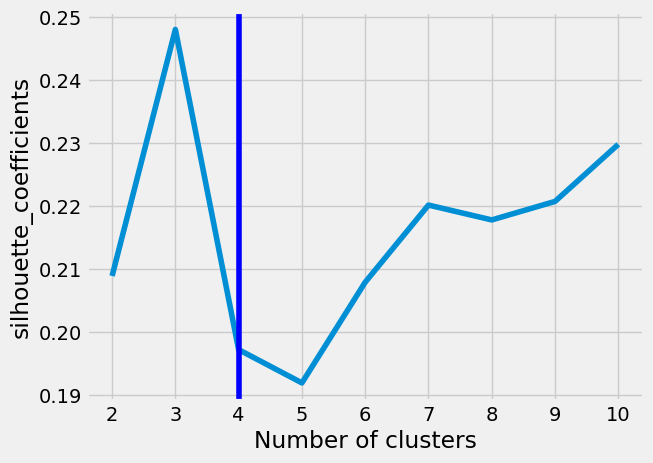

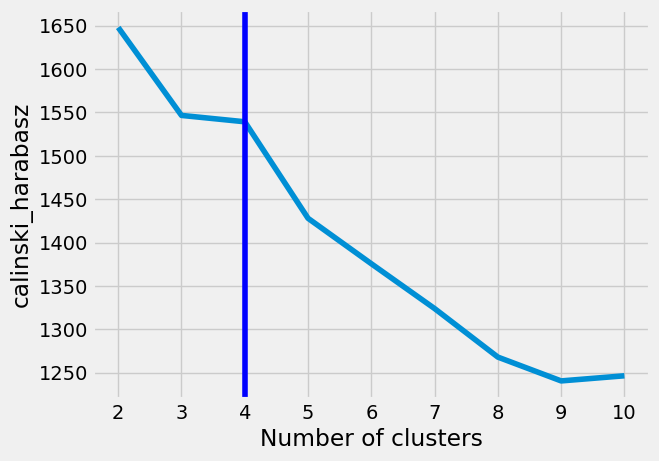

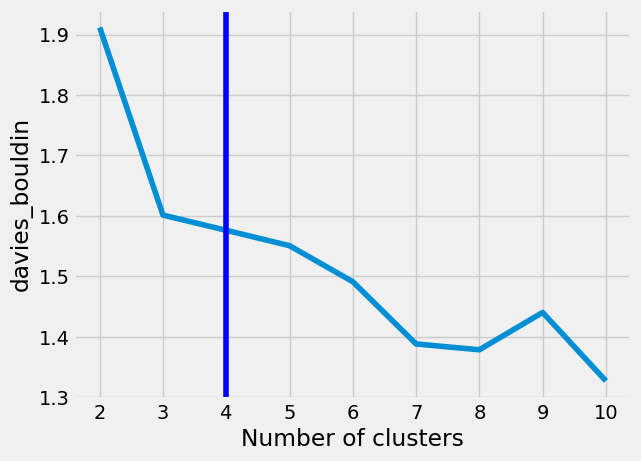

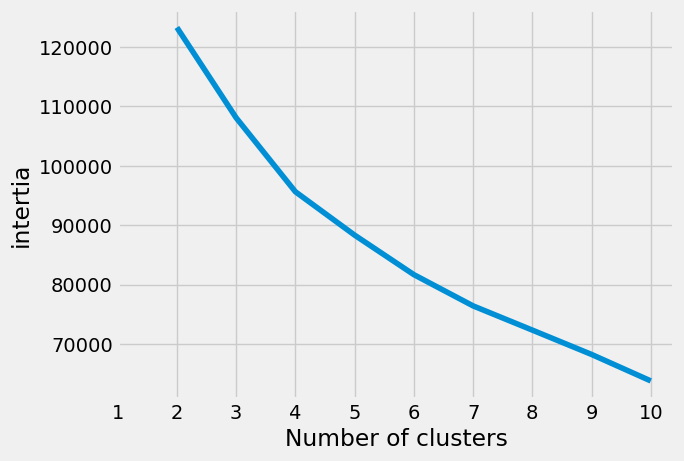

In [166]:
plt.style.use('fivethirtyeight')
plt.plot(range(2,11), silhouette)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel ("silhouette_coefficients")
plt.axvline(x=k1.elbow, color="b", label="axvline_full height")         
plt.show()


plt.style.use('fivethirtyeight')
plt.plot(range(2,11), calinski_harabasz)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel ("calinski_harabasz")
plt.axvline(x=k1.elbow, color="b", label="axvline_full height")         
plt.show()

plt.style.use('fivethirtyeight')
plt.plot(range(2,11), davies_bouldin)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel ("davies_bouldin")
plt.axvline(x=k1.elbow, color="b", label="axvline_full height")        
plt.show()

plt.style.use('fivethirtyeight')
plt.plot(range(2,11), list)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("intertia")
plt.show()

The bestScore for silhouette is related to clusters_number=3
The bestScore for calinski_harabasz is related to clusters_number=3
The bestScores for davies_bouldin is related to clusters_number=2,3
The lowest elbow for intertia is related to clusters_number=4

So, we choose the clusters_number=3

### the highest silhouette_coefficients is related to the clusters=3

In [167]:

kmeans=KMeans(n_clusters=3).fit(scaled_data)
centroids=kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print("Labels=", labels)

[[ 1.08394332  0.44125743  2.50589107  2.14832094  1.97643213  0.30945607
   1.11383055  1.63869344  1.05994545  0.00463488  0.15973418  2.51622105
   1.43650076  1.82319525  0.54758077  0.28977948  0.31119766]
 [-0.37169475  0.06179718  0.0338213  -0.0441228   0.16099297 -0.3732374
   0.80253274  0.20802734  0.69784937 -0.4875562  -0.37062988  0.17557822
  -0.12735205 -0.18663639 -0.1120606   0.39585308  0.04575319]
 [ 0.19416549 -0.113534   -0.358188   -0.24100426 -0.4038843   0.29681756
  -0.87083428 -0.40223033 -0.76919197  0.43997485  0.31403622 -0.4876374
  -0.0727292  -0.06971406  0.02967188 -0.39559953 -0.08203155]]
Labels= [2 2 1 ... 1 2 2]


In [168]:

labels_df=pd.DataFrame(labels)
labels_df


0
0     2
1     2
2     1
3     2
4     1
...  ..
8631  2
8632  1
8633  1
8634  2
8635  2

[8636 rows x 1 columns]

In [169]:
# Concat a new column including labels for ploatting

labels_df['cluster'] = labels# defining a new dataframe to dedicate a column's name to the dataframe.
df3=pd.concat([scaled_data, labels_df], axis=1)
df3.head()


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.744625          -0.370047  -0.429184         -0.359160   
1  0.764152           0.067679  -0.473208         -0.359160   
2  0.426602           0.505405  -0.116413          0.099909   
3 -0.373910           0.505405  -0.465825         -0.349660   
4  0.099551           0.505405   0.142062         -0.359160   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.354826     -0.468655            -0.820769   
1               -0.458839      2.568556            -1.236139   
2               -0.458839     -0.468655             1.256077   
3               -0.458839     -0.468655            -1.028455   
4                0.994815     -0.468655             0.425339   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.686280                         -0.717179   
1                   -0.686280                         -0.926522   
2                    2.646651                         -0.926522   
3                   -0.408536                         -0.926522   
4                   -0.686280                          0.538882   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.681953         -0.479437      -0.517623     -0.962575   
1                0.557022          0.099258      -0.597054      0.677204   
2               -0.681953         -0.479437      -0.120467      0.813852   
3               -0.681953         -0.479437      -0.557339     -0.907916   
4               -0.681953         -0.479437      -0.279329     -0.743938   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  0  cluster  
0 -0.543942         -0.305508         -0.537727  0.355181  2        2  
1  0.796852          0.087689          0.212380  0.355181  2        2  
2 -0.399503         -0.099906         -0.537727  0.355181  1        1  
3 -0.380165         -0.261131         -0.537727  0.355181  2        2  
4 -0.132119          0.650363         -0.537727  0.355181  1        1

In [170]:
print (df.dtypes)

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


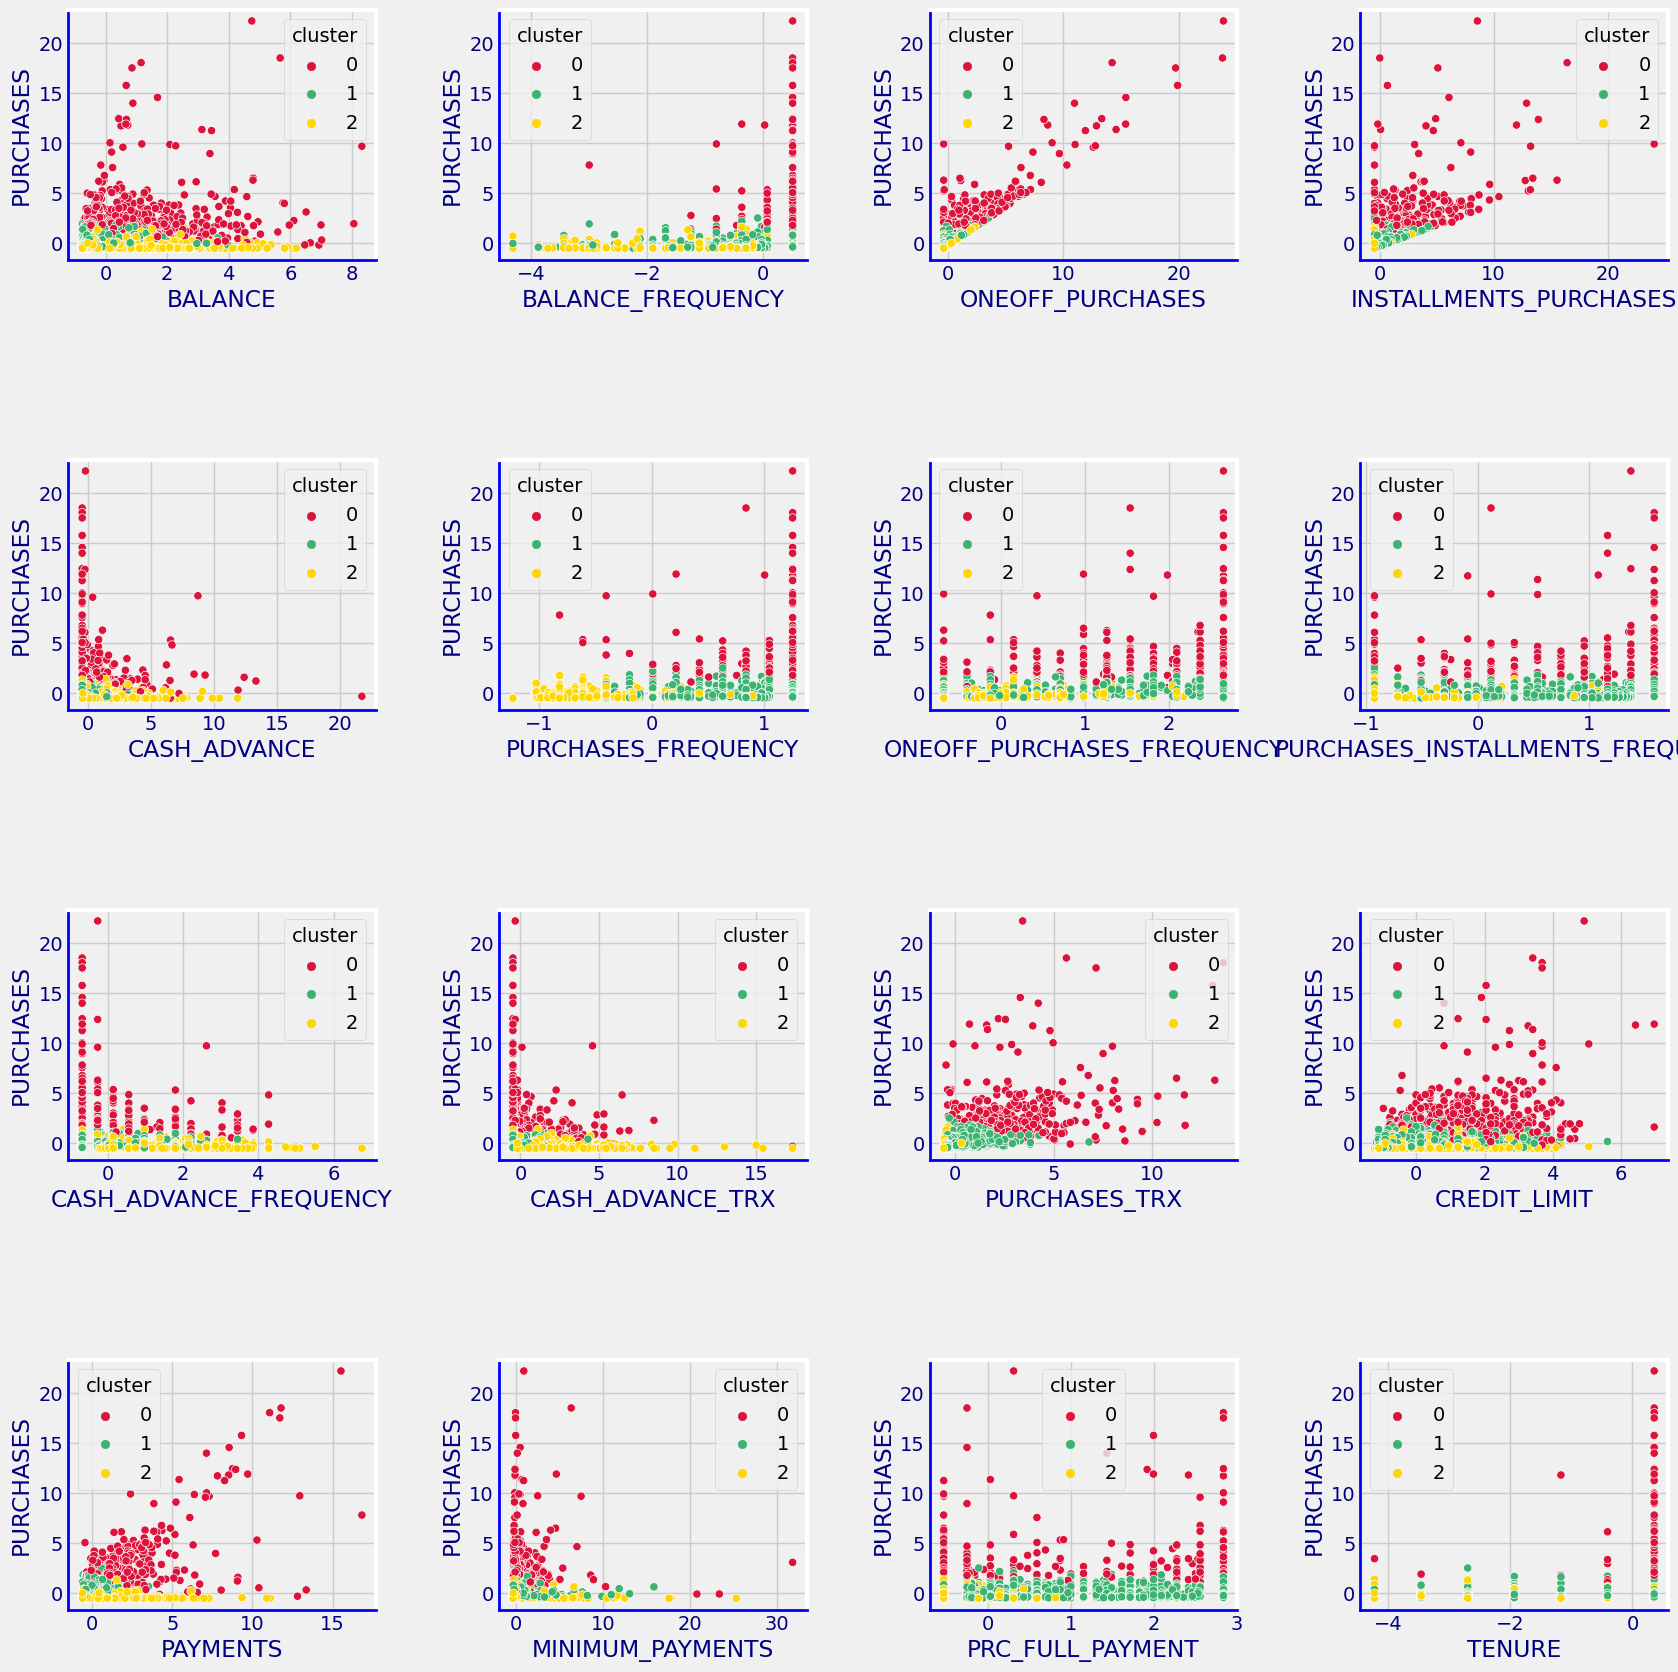

In [171]:
# plot int features according to the 'PURCHASES' 


col_names=['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)
palette1=["crimson","MediumSeaGreen","gold"]
j=0 
for i in col_names:
     
    plt.subplot(4,4,j+1)
    ax = sns.scatterplot(x=i , y  ='PURCHASES', hue="cluster", data=df3, palette=palette1)
    j=j+1
    ax.spines['bottom'].set_color('blue')
    ax.spines['top'].set_color('white') 
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_color('blue')
    ax.xaxis.label.set_color('navy')
    ax.yaxis.label.set_color('navy')
    ax.tick_params(colors="navy", which='both')  # 'both' refers to minor and major axes

                                                         #  2. Hierarchical Clustering


                                                       ##    Type 1 Agglomerative Clustering

In [172]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the data and transform the data
scaled_data = scaler.fit_transform(df)# Step 1 : by this code we miss the names of columns
scaled_data=pd.DataFrame(scaled_data, columns =df.columns)# Step2: we should convert scaled data to DataFrame and borrow the nemes of columns from df. 
scaled_data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.744625          -0.370047  -0.429184         -0.359160   
1     0.764152           0.067679  -0.473208         -0.359160   
2     0.426602           0.505405  -0.116413          0.099909   
3    -0.373910           0.505405  -0.465825         -0.349660   
4     0.099551           0.505405   0.142062         -0.359160   
...        ...                ...        ...               ...   
8631 -0.761342          -1.902089  -0.463563         -0.346751   
8632 -0.750546           0.505405  -0.338865         -0.359160   
8633 -0.752977          -0.297095  -0.406572         -0.359160   
8634 -0.757721          -0.297095  -0.473208         -0.359160   
8635 -0.586278          -1.099590   0.031295          0.289957   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.354826     -0.468655            -0.820769   
1                  -0.458839      2.568556            -1.236139   
2                  -0.458839     -0.468655             1.256077   
3                  -0.458839     -0.468655            -1.028455   
4                   0.994815     -0.468655             0.425339   
...                      ...           ...                  ...   
8631               -0.458839     -0.468655            -0.820769   
8632               -0.141436     -0.468655             1.256077   
8633               -0.301402     -0.468655             0.840707   
8634               -0.458839     -0.451422            -1.236139   
8635               -0.458839     -0.408769             0.425339   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.686280                         -0.717179   
1                      -0.686280                         -0.926522   
2                       2.646651                         -0.926522   
3                      -0.408536                         -0.926522   
4                      -0.686280                          0.538882   
...                          ...                               ...   
8631                   -0.130790                         -0.926522   
8632                   -0.686280                          1.166912   
8633                   -0.686280                          0.748227   
8634                   -0.686280                         -0.926522   
8635                    1.535675                         -0.926522   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.681953         -0.479437      -0.517623     -0.962575   
1                   0.557022          0.099258      -0.597054      0.677204   
2                  -0.681953         -0.479437      -0.120467      0.813852   
3                  -0.681953         -0.479437      -0.557339     -0.907916   
4                  -0.681953         -0.479437      -0.279329     -0.743938   
...                      ...               ...            ...           ...   
8631               -0.681953         -0.479437      -0.557339     -1.099224   
8632               -0.681953         -0.479437      -0.358760     -0.962575   
8633               -0.681953         -0.479437      -0.398476     -0.962575   
8634                0.144032         -0.190089      -0.597054     -1.099224   
8635                0.970012         -0.190089       0.316405     -0.907916   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.543942         -0.305508         -0.537727  0.355181  
1     0.796852          0.087689          0.212380  0.355181  
2    -0.399503         -0.099906         -0.537727  0.355181  
3    -0.380165         -0.261131         -0.537727  0.355181  
4    -0.132119          0.650363         -0.537727  0.355181  
...        ...               ...               ...       ...  
8631 -0.593143         -0.345988         -0.537727 -4.221800  
8632 -0.501396         -0.343706          1.150015 -4.221800  
8633 -0.585367         -0.329572          0.306144 -

In [173]:
#grid search for Agglomerative Clustering(finding optimum n_clusters and linkage according to the silhouette_score)


Scores={'silhouette_score': None, 'n_clusters': None, 'linkage':None}
# Define parameter ranges
param_grid = {
    'n_clusters': range(2, 10),
    'linkage': ['ward', 'complete', 'average', 'single']
}


# List to store results
Results = []

# Perform grid search
for n_clusters in param_grid['n_clusters']:
    for linkage in param_grid['linkage']:
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = model.fit_predict(scaled_data)
        score = silhouette_score(scaled_data, labels)
        
        # Append results to the list
        Results.append({'silhouette_score': score, 'n_clusters': n_clusters, 'linkage': linkage})

# Convert results to DataFrame for better visualization
Results = pd.DataFrame(Results)

print(Results)
print(Results.nlargest(3, 'silhouette_score'))

    silhouette_score  n_clusters   linkage
0           0.184185           2      ward
1           0.783712           2  complete
2           0.838913           2   average
3           0.838913           2    single
4           0.178453           3      ward
5           0.783461           3  complete
6           0.809869           3   average
7           0.835953           3    single
8           0.162612           4      ward
9           0.775614           4  complete
10          0.804785           4   average
11          0.809364           4    single
12          0.179581           5      ward
13          0.698631           5  complete
14          0.785262           5   average
15          0.808861           5    single
16          0.183169           6      ward
17          0.698416           6  complete
18          0.780342           6   average
19          0.768660           6    single
20          0.167092           7      ward
21          0.530054           7  complete
22         

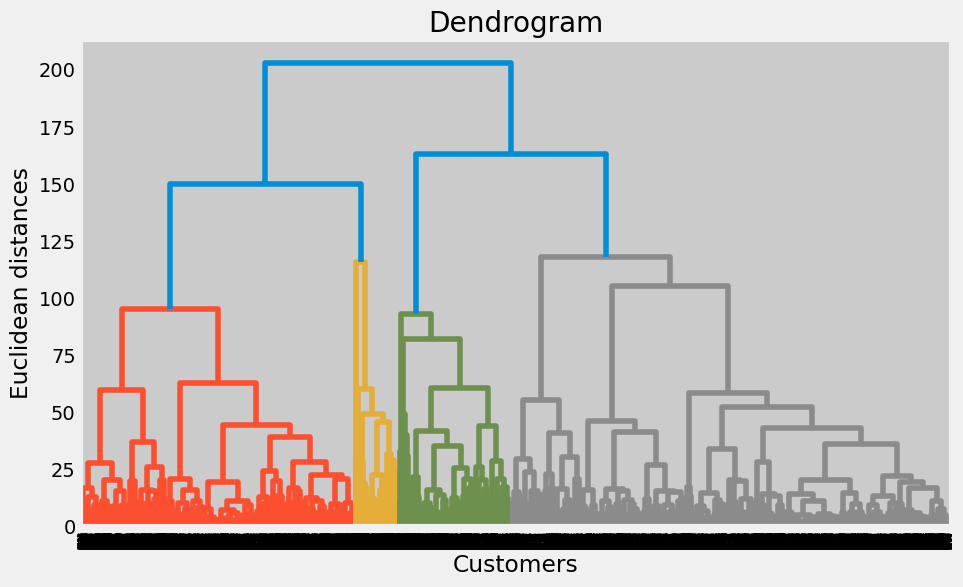

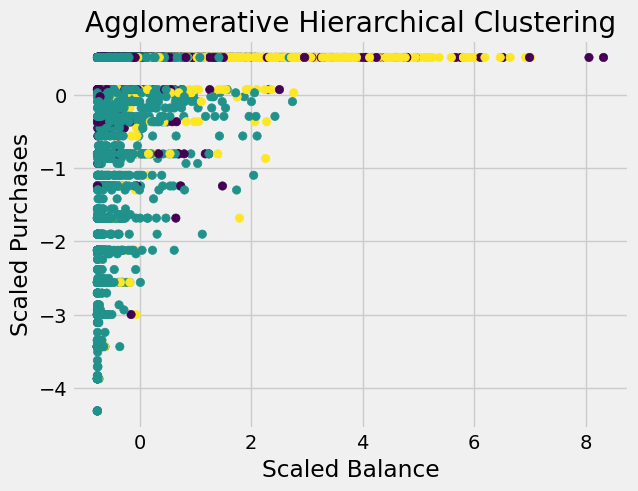

In [174]:

# dendrogram



import scipy.cluster.hierarchy as sch
# Convert DataFrame to NumPy array 
scaled_data = scaled_data.to_numpy() if isinstance(scaled_data, pd.DataFrame) else scaled_data
# Perform hierarchical clustering
# Define the linkage method (e.g., 'ward', 'complete', 'average', 'single')
linkage_method = 'ward'
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')#linkage= single and average did not work!
cluster_labels = hc.fit_predict(scaled_data)

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method=linkage_method))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Visualize clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Scaled Balance')
plt.ylabel('Scaled Purchases')
plt.show()


silhouette:  [0.8389125052466642, 0.8359528860488419, 0.8093637530677412, 0.8088609228111301, 0.7686595686047101, 0.7688039708570221, 0.7683689469878263, 0.7686185356253847, 0.7481526097549525]
calinski_harabasz:  [59.021757262681774, 63.75166512739358, 56.96276224503323, 59.88263010250269, 53.83121381620076, 57.0944009075807, 53.89570338064626, 58.836609540037514, 55.252466097336395]
davies_bouldin:  [0.11163752409104832, 0.10910056322773398, 0.11976138698369632, 0.11676242485802349, 0.12897801430355776, 0.1251005498951363, 0.12814992083174837, 0.12398854875995083, 0.1301968269603407]


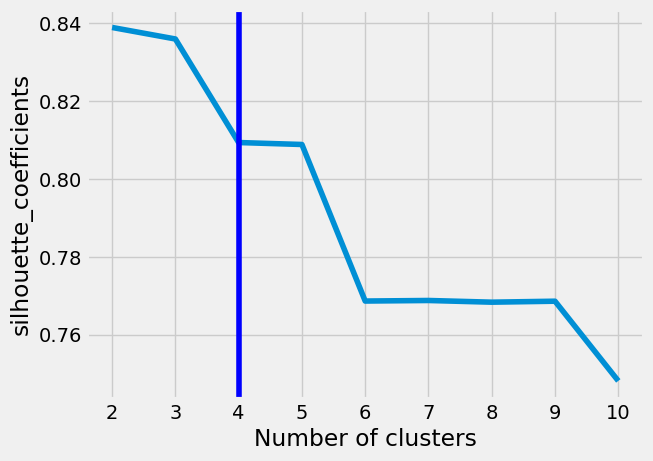

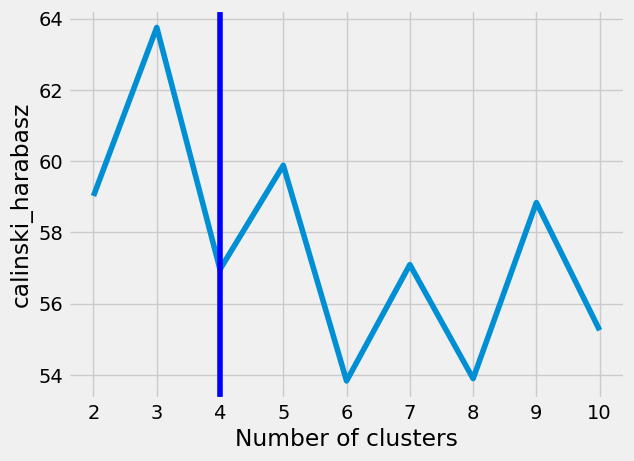

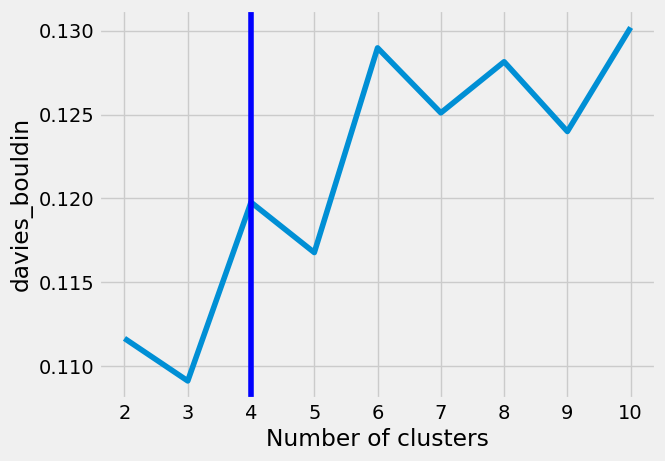

In [175]:
###  Evaluation & Plotting scores according to number of clusters
### Getting Lists of Scores according to Cluster_numbers


silhouette = []
for k in range(2,11):
    hc = AgglomerativeClustering(n_clusters=k, linkage='single')
    hc.fit(scaled_data)
    S_score = silhouette_score(scaled_data, hc.labels_)
    silhouette.append(S_score)
    
   

calinski_harabasz = []
for k in range(2,11):
    hc = AgglomerativeClustering(n_clusters=k, linkage='single')
    hc.fit(scaled_data)
    C_score = calinski_harabasz_score(scaled_data, hc.labels_)
    calinski_harabasz.append(C_score)
    
  
davies_bouldin = []
for k in range(2,11):
    hc = AgglomerativeClustering(n_clusters=k, linkage='single')
    hc.fit(scaled_data)
    D_score = davies_bouldin_score(scaled_data, hc.labels_)
    davies_bouldin.append(D_score)


print('silhouette: ', silhouette)
print('calinski_harabasz: ', calinski_harabasz)
print('davies_bouldin: ', davies_bouldin)

plt.style.use('fivethirtyeight')
plt.plot(range(2,11), silhouette)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel ("silhouette_coefficients")
plt.axvline(x=k1.elbow, color="b", label="axvline_full height")         
plt.show()


plt.style.use('fivethirtyeight')
plt.plot(range(2,11), calinski_harabasz)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel ("calinski_harabasz")
plt.axvline(x=k1.elbow, color="b", label="axvline_full height")         
plt.show()

plt.style.use('fivethirtyeight')
plt.plot(range(2,11), davies_bouldin)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel ("davies_bouldin")
plt.axvline(x=k1.elbow, color="b", label="axvline_full height")        
plt.show()

Agglomerative Clustering:


silhouette: 2,3
calinski_harabasz: 3
davies_bouldin 10!

So, we choose clusters=3

In [176]:
# Ploting dataset

#Step1: implementation the optimum parameters and labeling
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')# important note: the previous results shaowed that linkage of 'single' and 'awerage' have the best scores, they did not seperate well!
cluster_labels = hc.fit_predict(scaled_data)
df4=pd.concat([pd.DataFrame(scaled_data), pd.DataFrame({'cluster':cluster_labels})], axis=1)
unique_clusters = df4['cluster'].unique()
unique_clusters

array([1, 2, 0], dtype=int64)

In [177]:
df4

0         1         2         3         4         5         6  \
0    -0.744625 -0.370047 -0.429184 -0.359160 -0.354826 -0.468655 -0.820769   
1     0.764152  0.067679 -0.473208 -0.359160 -0.458839  2.568556 -1.236139   
2     0.426602  0.505405 -0.116413  0.099909 -0.458839 -0.468655  1.256077   
3    -0.373910  0.505405 -0.465825 -0.349660 -0.458839 -0.468655 -1.028455   
4     0.099551  0.505405  0.142062 -0.359160  0.994815 -0.468655  0.425339   
...        ...       ...       ...       ...       ...       ...       ...   
8631 -0.761342 -1.902089 -0.463563 -0.346751 -0.458839 -0.468655 -0.820769   
8632 -0.750546  0.505405 -0.338865 -0.359160 -0.141436 -0.468655  1.256077   
8633 -0.752977 -0.297095 -0.406572 -0.359160 -0.301402 -0.468655  0.840707   
8634 -0.757721 -0.297095 -0.473208 -0.359160 -0.458839 -0.451422 -1.236139   
8635 -0.586278 -1.099590  0.031295  0.289957 -0.458839 -0.408769  0.425339   

             7         8         9        10        11        12        13  \
0    -0.686280 -0.717179 -0.681953 -0.479437 -0.517623 -0.962575 -0.543942   
1    -0.686280 -0.926522  0.557022  0.099258 -0.597054  0.677204  0.796852   
2     2.646651 -0.926522 -0.681953 -0.479437 -0.120467  0.813852 -0.399503   
3    -0.408536 -0.926522 -0.681953 -0.479437 -0.557339 -0.907916 -0.380165   
4    -0.686280  0.538882 -0.681953 -0.479437 -0.279329 -0.743938 -0.132119   
...        ...       ...       ...       ...       ...       ...       ...   
8631 -0.130790 -0.926522 -0.681953 -0.479437 -0.557339 -1.099224 -0.593143   
8632 -0.686280  1.166912 -0.681953 -0.479437 -0.358760 -0.962575 -0.501396   
8633 -0.686280  0.748227 -0.681953 -0.479437 -0.398476 -0.962575 -0.585367   
8634 -0.686280 -0.926522  0.144032 -0.190089 -0.597054 -1.099224 -0.595238   
8635  1.535675 -0.926522  0.970012 -0.190089  0.316405 -0.907916 -0.591589   

            14        15        16  cluster  
0    -0.305508 -0.537727  0.355181        1  
1     0.087689  0.212380  0.355181        2  
2    -0.099906 -0.537727  0.355181        0  
3    -0.261131 -0.537727  0.355181        1  
4     0.650363 -0.537727  0.355181        1  
...        ...       ...       ...      ...  
8631 -0.345988 -0.537727 -4.221800        1  
8632 -0.343706  1.150015 -4.221800        1  
8633 -0.329572  0.306144 -4.221800        1  
8634 -0.340811  0.306144 -4.221800        1  
8635 -0.327098 -0.537727 -4.221800        1  

[8636 rows x 18 columns]

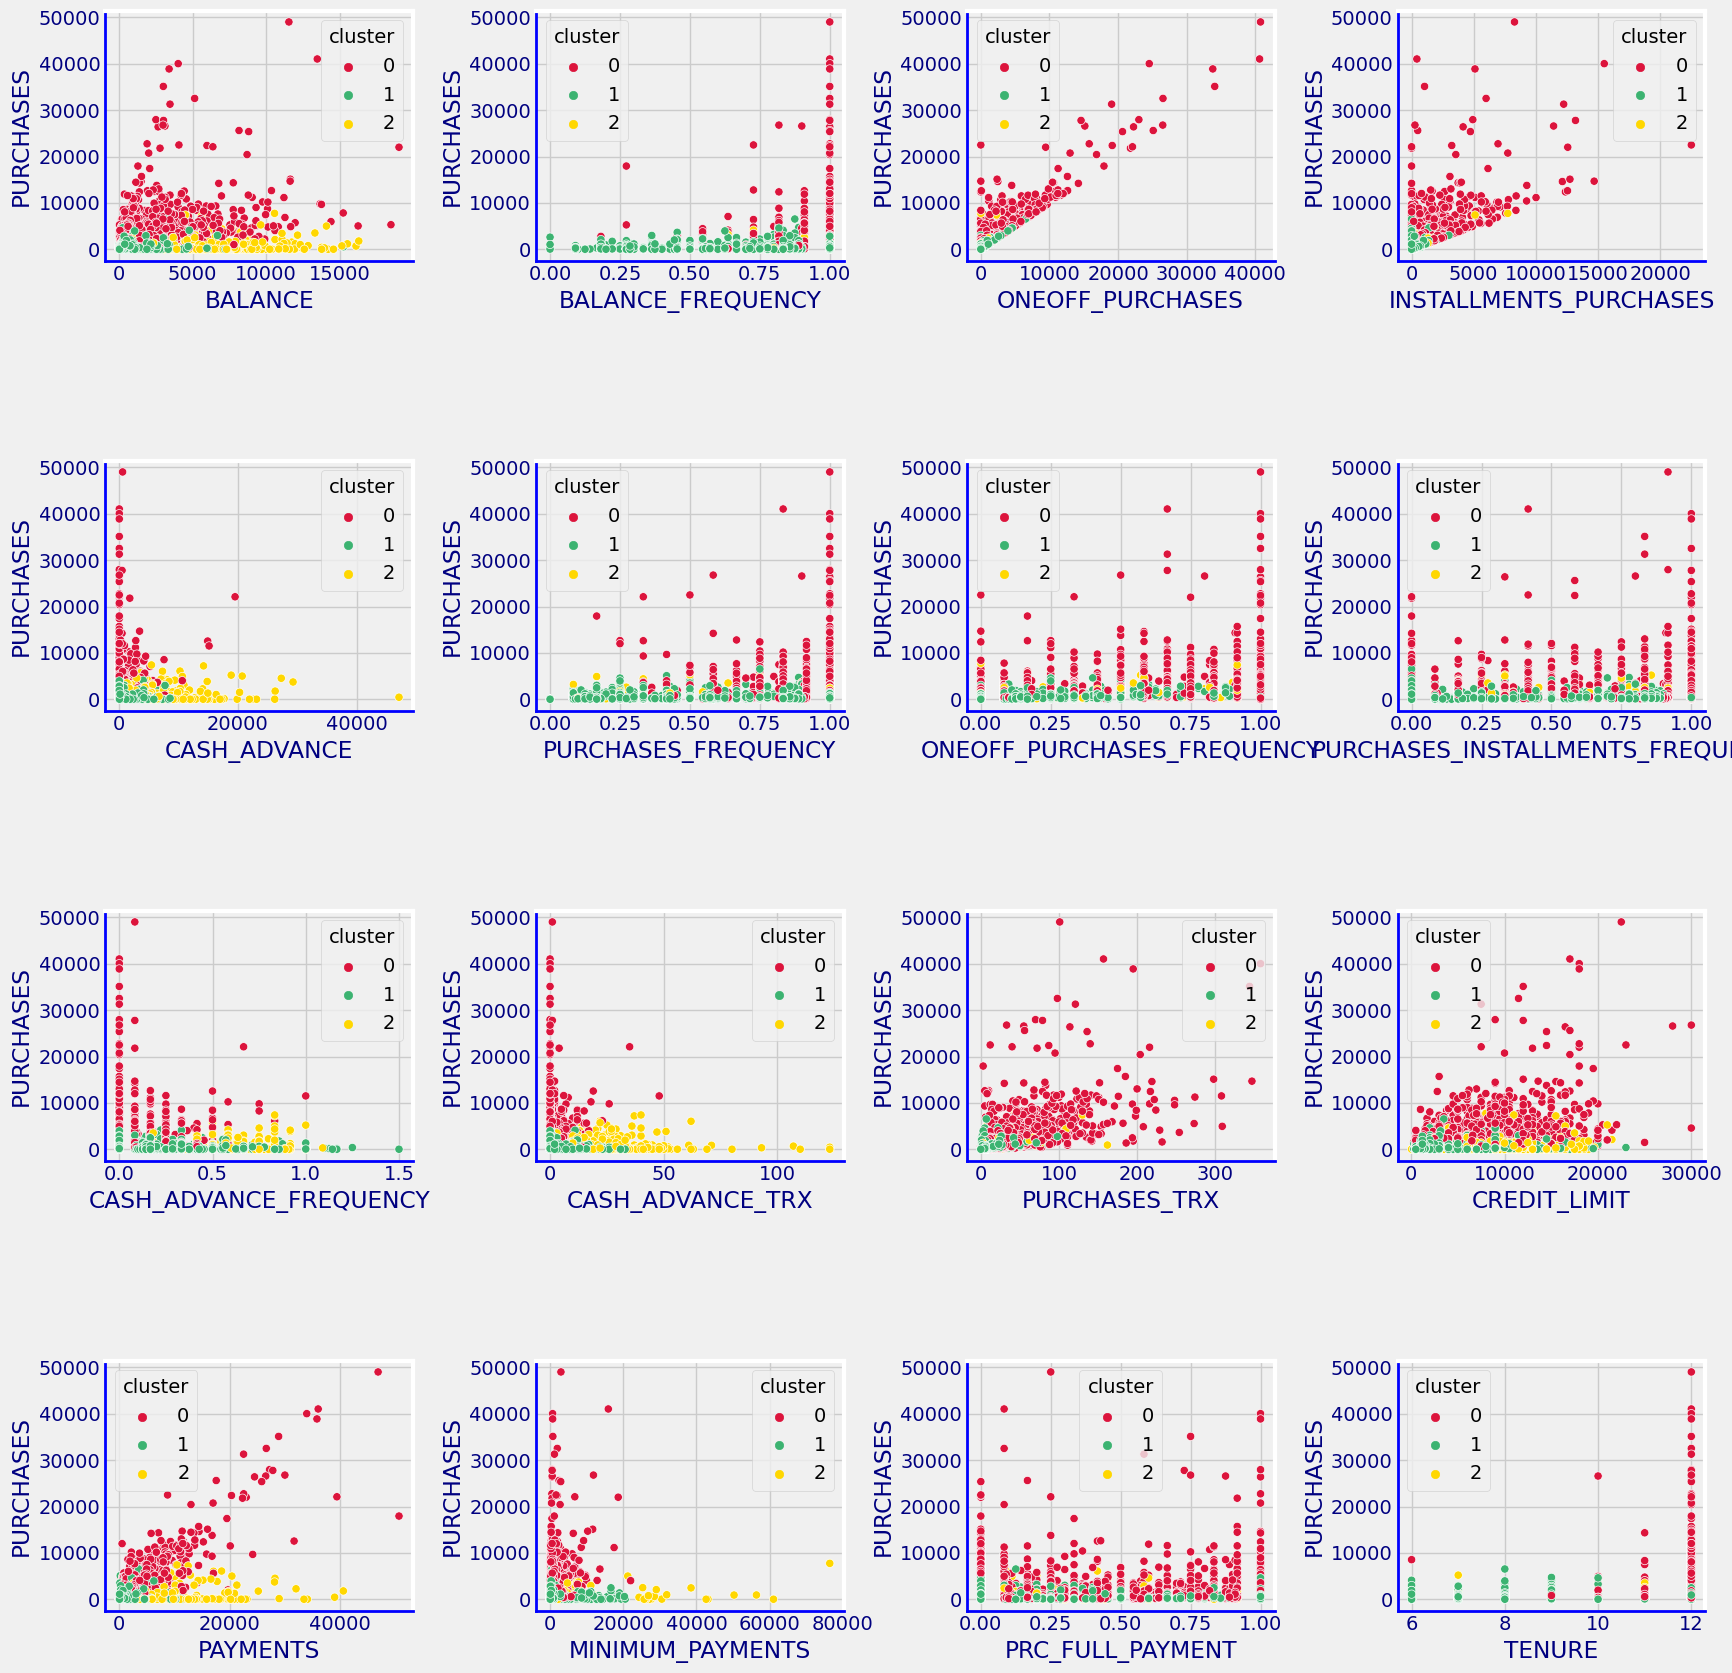

In [178]:


# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert scaled_data to DataFrame and borrow the column names from df
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)

# Perform hierarchical clustering on scaled_data
linkage_method = 'ward'
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = hc.fit_predict(scaled_data)

# Add cluster labels to the original DataFrame
df4 = df.copy()
df4['cluster'] = cluster_labels

# Define column names for plotting
col_names = ['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
             'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
             'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 
             'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 
             'PRC_FULL_PAYMENT', 'TENURE']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)
palette1 = ["crimson", "MediumSeaGreen", "gold"]

# Plotting each subplot
for j, col_name in enumerate(col_names):
    ax = axes[j // 4, j % 4]
    sns.scatterplot(x=col_name, y='PURCHASES', hue='cluster', data=df4, palette=palette1, ax=ax)
    ax.spines['bottom'].set_color('blue')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_color('blue')
    ax.xaxis.label.set_color('navy')
    ax.yaxis.label.set_color('navy')
    ax.tick_params(colors="navy", which='both')

plt.show()


In [ ]:
                                                         #  3.DBSCAN

In [179]:
#grid search for DBSCAN


# Convert DataFrame to NumPy array
numpy_array = scaled_data.values
Results = []


# Define a range of epsilon values
eps_values = np.linspace(1, 5, num=20)
min_samples_values = range(2, 11)
best_score = -1
best_params = {'eps': None, 'min_samples': None}

# Perform grid search
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        labels = dbscan.fit_predict(scaled_data)
        S_score =  silhouette_score(scaled_data, labels)
        C_score = calinski_harabasz_score(scaled_data, dbscan.labels_)
        D_score = davies_bouldin_score(scaled_data, dbscan.labels_)
       
        # Append results to the list
        Results.append({'silhouette_score': S_score, 'calinski_harabasz_score': C_score,'davies_bouldin_score':D_score,
                        'eps': eps, 'min_samples': min_samples})

# Convert results to DataFrame for better visualization
Results = pd.DataFrame(Results)

print(Results)




     silhouette_score  calinski_harabasz_score  davies_bouldin_score  eps  \
0           -0.464222                 7.770289              1.419887  1.0   
1           -0.423325                17.780600              1.509464  1.0   
2           -0.314724                39.721014              1.524106  1.0   
3           -0.261413                50.801229              1.518667  1.0   
4           -0.160242               117.655530              1.585218  1.0   
..                ...                      ...                   ...  ...   
175          0.749668               651.917485              1.400779  5.0   
176          0.748834               656.608112              1.404210  5.0   
177          0.747494               659.958714              1.406725  5.0   
178          0.747494               659.958714              1.406725  5.0   
179          0.746697               661.438201              1.415695  5.0   

     min_samples  
0              2  
1              3  
2              4  

In [180]:
# Convert DataFrame to NumPy array
numpy_array = scaled_data.values
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=5.0   , min_samples=6)
labels = dbscan.fit_predict(numpy_array)
df5=pd.concat([pd.DataFrame(scaled_data), pd.DataFrame({'cluster_dbscan':labels})], axis=1)
df5
df5['cluster_dbscan'].unique()
#Cluster labels (0, 1, 2, ...): Positive integer values represent different clusters.
#Noise points (-1): Negative values, specifically -1, represent points that are considered noise, meaning they do not fit into any cluster based on the eps and min_samples parameters.

array([ 0, -1], dtype=int64)

                                                   EVALUATION OF DBSCAN

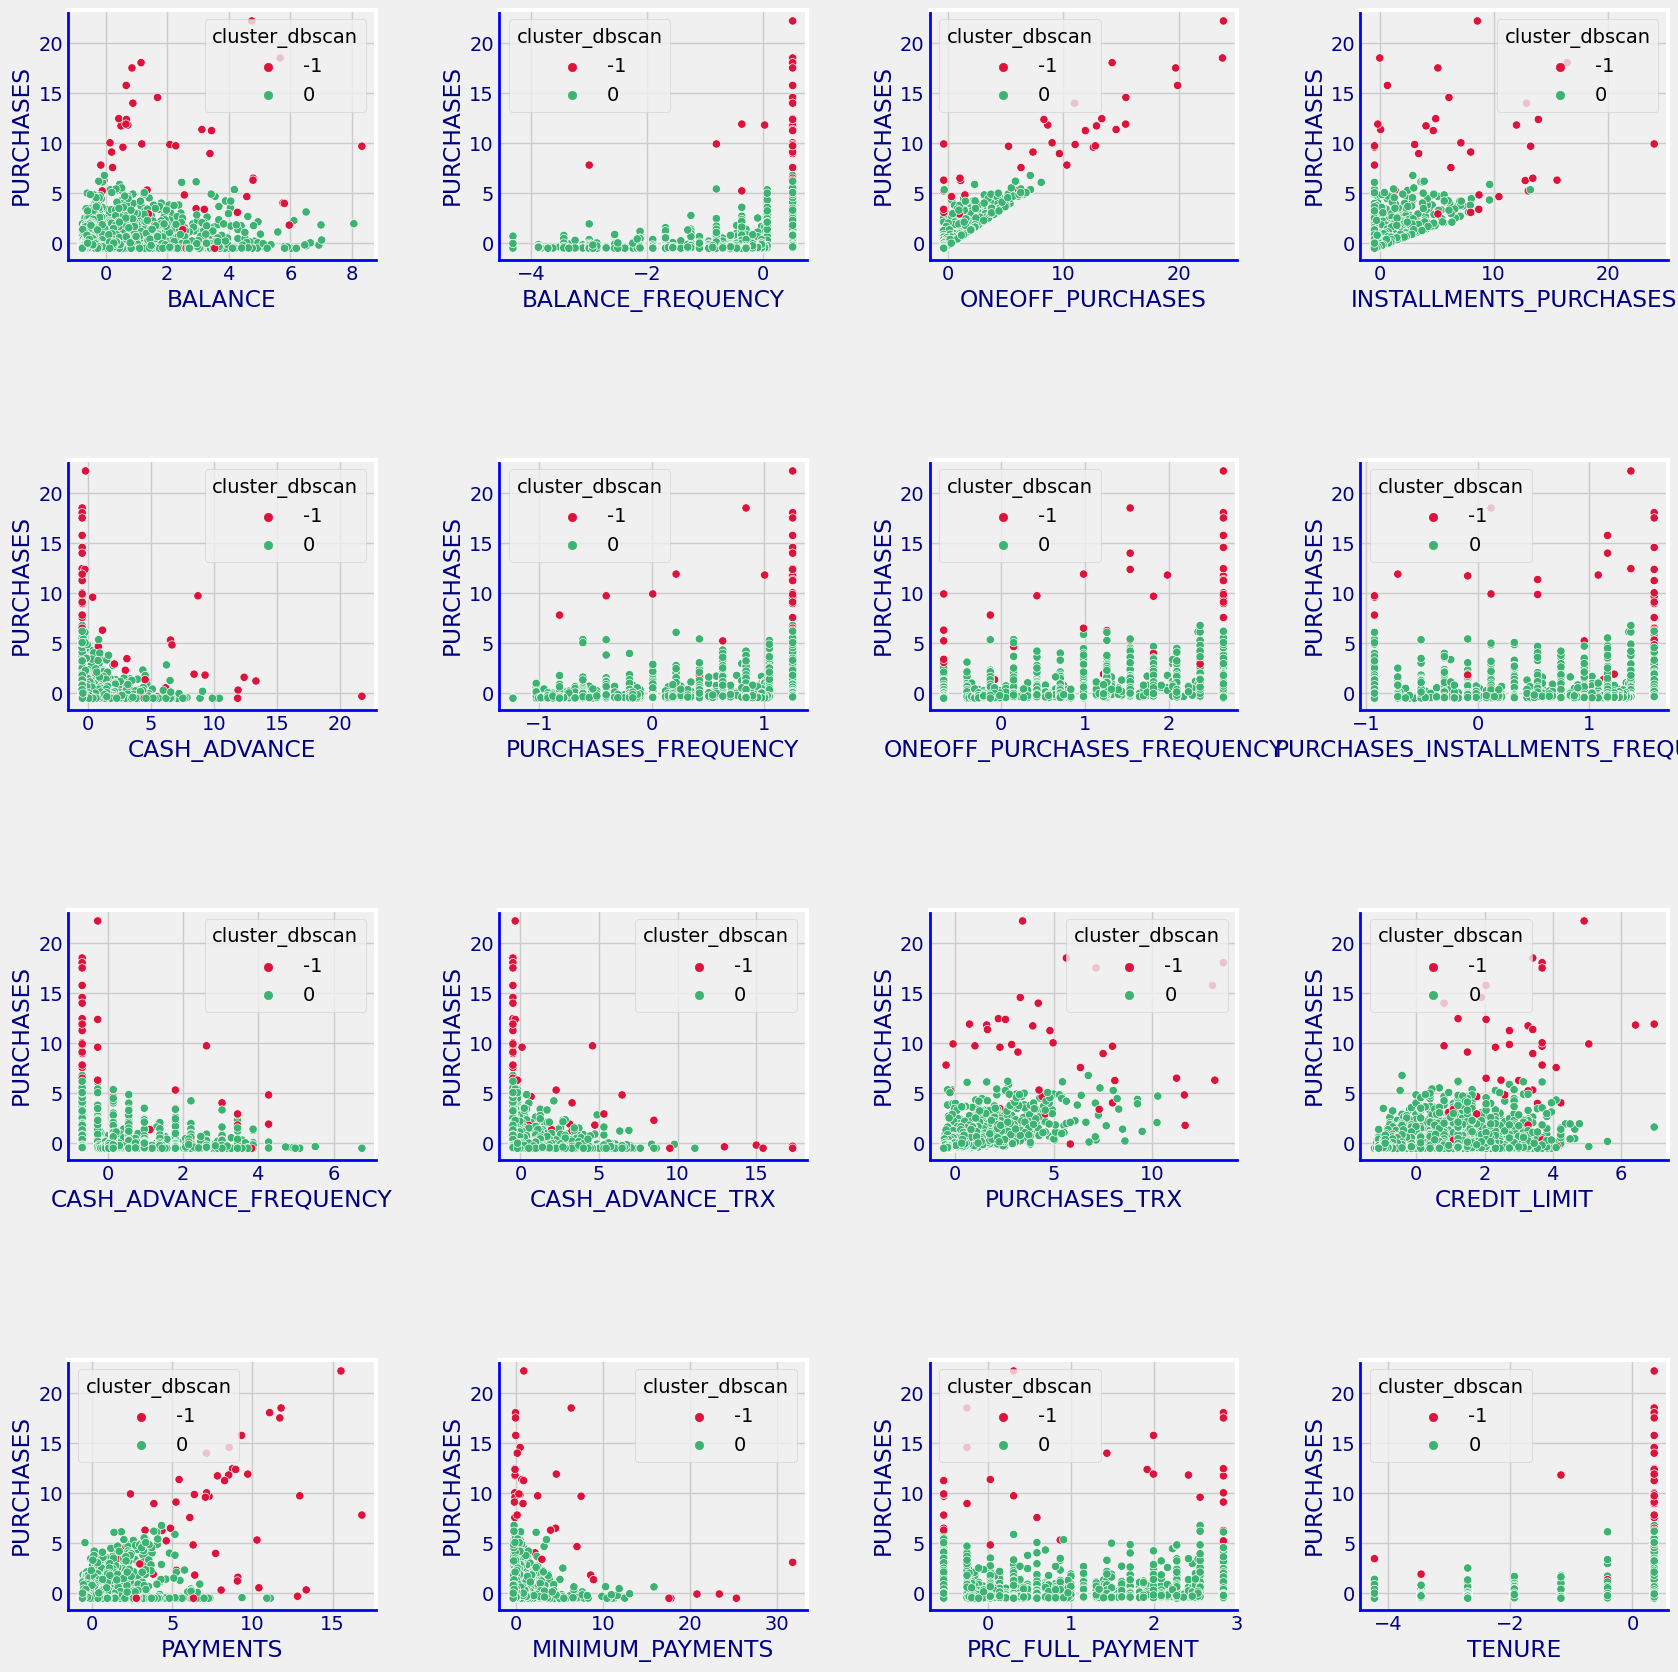

In [181]:

# Define column names for plotting
col_names = ['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
             'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
             'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 
             'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 
             'PRC_FULL_PAYMENT', 'TENURE']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)
palette1 = ["crimson", "MediumSeaGreen", "gold"]

# Plotting each subplot
for j, col_name in enumerate(col_names):
    ax = axes[j // 4, j % 4]
    sns.scatterplot(x=col_name, y='PURCHASES', hue='cluster_dbscan', data=df5, palette=palette1, ax=ax)
    ax.spines['bottom'].set_color('blue')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_color('blue')
    ax.xaxis.label.set_color('navy')
    ax.yaxis.label.set_color('navy')
    ax.tick_params(colors="navy", which='both')

plt.show()


DBSCAN ALGORITHM DIVIDES THE DATASET INTO 2 CLUSTERS!

In [ ]:
                                                         #  4. MeanShift

In [182]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the data and transform the data
scaled_data = scaler.fit_transform(df)# Step 1 : by this code we miss the names of columns
scaled_data=pd.DataFrame(scaled_data, columns =df.columns)# Step2: we should convert scaled data to DataFrame and borrow the nemes of columns from df. 
scaled_data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.744625          -0.370047  -0.429184         -0.359160   
1     0.764152           0.067679  -0.473208         -0.359160   
2     0.426602           0.505405  -0.116413          0.099909   
3    -0.373910           0.505405  -0.465825         -0.349660   
4     0.099551           0.505405   0.142062         -0.359160   
...        ...                ...        ...               ...   
8631 -0.761342          -1.902089  -0.463563         -0.346751   
8632 -0.750546           0.505405  -0.338865         -0.359160   
8633 -0.752977          -0.297095  -0.406572         -0.359160   
8634 -0.757721          -0.297095  -0.473208         -0.359160   
8635 -0.586278          -1.099590   0.031295          0.289957   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.354826     -0.468655            -0.820769   
1                  -0.458839      2.568556            -1.236139   
2                  -0.458839     -0.468655             1.256077   
3                  -0.458839     -0.468655            -1.028455   
4                   0.994815     -0.468655             0.425339   
...                      ...           ...                  ...   
8631               -0.458839     -0.468655            -0.820769   
8632               -0.141436     -0.468655             1.256077   
8633               -0.301402     -0.468655             0.840707   
8634               -0.458839     -0.451422            -1.236139   
8635               -0.458839     -0.408769             0.425339   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.686280                         -0.717179   
1                      -0.686280                         -0.926522   
2                       2.646651                         -0.926522   
3                      -0.408536                         -0.926522   
4                      -0.686280                          0.538882   
...                          ...                               ...   
8631                   -0.130790                         -0.926522   
8632                   -0.686280                          1.166912   
8633                   -0.686280                          0.748227   
8634                   -0.686280                         -0.926522   
8635                    1.535675                         -0.926522   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.681953         -0.479437      -0.517623     -0.962575   
1                   0.557022          0.099258      -0.597054      0.677204   
2                  -0.681953         -0.479437      -0.120467      0.813852   
3                  -0.681953         -0.479437      -0.557339     -0.907916   
4                  -0.681953         -0.479437      -0.279329     -0.743938   
...                      ...               ...            ...           ...   
8631               -0.681953         -0.479437      -0.557339     -1.099224   
8632               -0.681953         -0.479437      -0.358760     -0.962575   
8633               -0.681953         -0.479437      -0.398476     -0.962575   
8634                0.144032         -0.190089      -0.597054     -1.099224   
8635                0.970012         -0.190089       0.316405     -0.907916   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.543942         -0.305508         -0.537727  0.355181  
1     0.796852          0.087689          0.212380  0.355181  
2    -0.399503         -0.099906         -0.537727  0.355181  
3    -0.380165         -0.261131         -0.537727  0.355181  
4    -0.132119          0.650363         -0.537727  0.355181  
...        ...               ...               ...       ...  
8631 -0.593143         -0.345988         -0.537727 -4.221800  
8632 -0.501396         -0.343706          1.150015 -4.221800  
8633 -0.585367         -0.329572          0.306144 -

In [183]:
# Define the parameter grid to search
param_grid = {
    'bandwidth': range(1, 20),  # Adjust bandwidth values
    'bin_seeding': [True, False]
}

results = []

# Perform grid search manually
for bandwidth in param_grid['bandwidth']:
    for bin_seeding in param_grid['bin_seeding']:
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=bin_seeding)
        labels = ms.fit_predict(scaled_data)
        
        # Check the number of unique clusters
        if len(set(labels)) > 1:
            S_score = silhouette_score(scaled_data, labels)
            C_score = calinski_harabasz_score(scaled_data, labels)
            D_score = davies_bouldin_score(scaled_data, labels)
            
            # Append results to the list
            results.append({'silhouette_score': S_score, 
                            'calinski_harabasz_score': C_score,
                            'davies_bouldin_score': D_score,
                            'bandwidth': bandwidth, 
                            'bin_seeding': bin_seeding})
        else:
            print(f"Skipping bandwidth={bandwidth}, bin_seeding={bin_seeding} as it resulted in a single cluster")

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the top 3 results based on silhouette score
print(results_df.nlargest(3, 'silhouette_score'))


Skipping bandwidth=15, bin_seeding=True as it resulted in a single cluster
Skipping bandwidth=15, bin_seeding=False as it resulted in a single cluster
Skipping bandwidth=16, bin_seeding=True as it resulted in a single cluster
Skipping bandwidth=16, bin_seeding=False as it resulted in a single cluster
Skipping bandwidth=17, bin_seeding=True as it resulted in a single cluster
Skipping bandwidth=17, bin_seeding=False as it resulted in a single cluster
Skipping bandwidth=18, bin_seeding=True as it resulted in a single cluster
Skipping bandwidth=18, bin_seeding=False as it resulted in a single cluster
Skipping bandwidth=19, bin_seeding=True as it resulted in a single cluster
Skipping bandwidth=19, bin_seeding=False as it resulted in a single cluster
    silhouette_score  calinski_harabasz_score  davies_bouldin_score  \
24          0.772976                83.367126              0.538763   
25          0.772976                83.367126              0.538763   
26          0.772976            

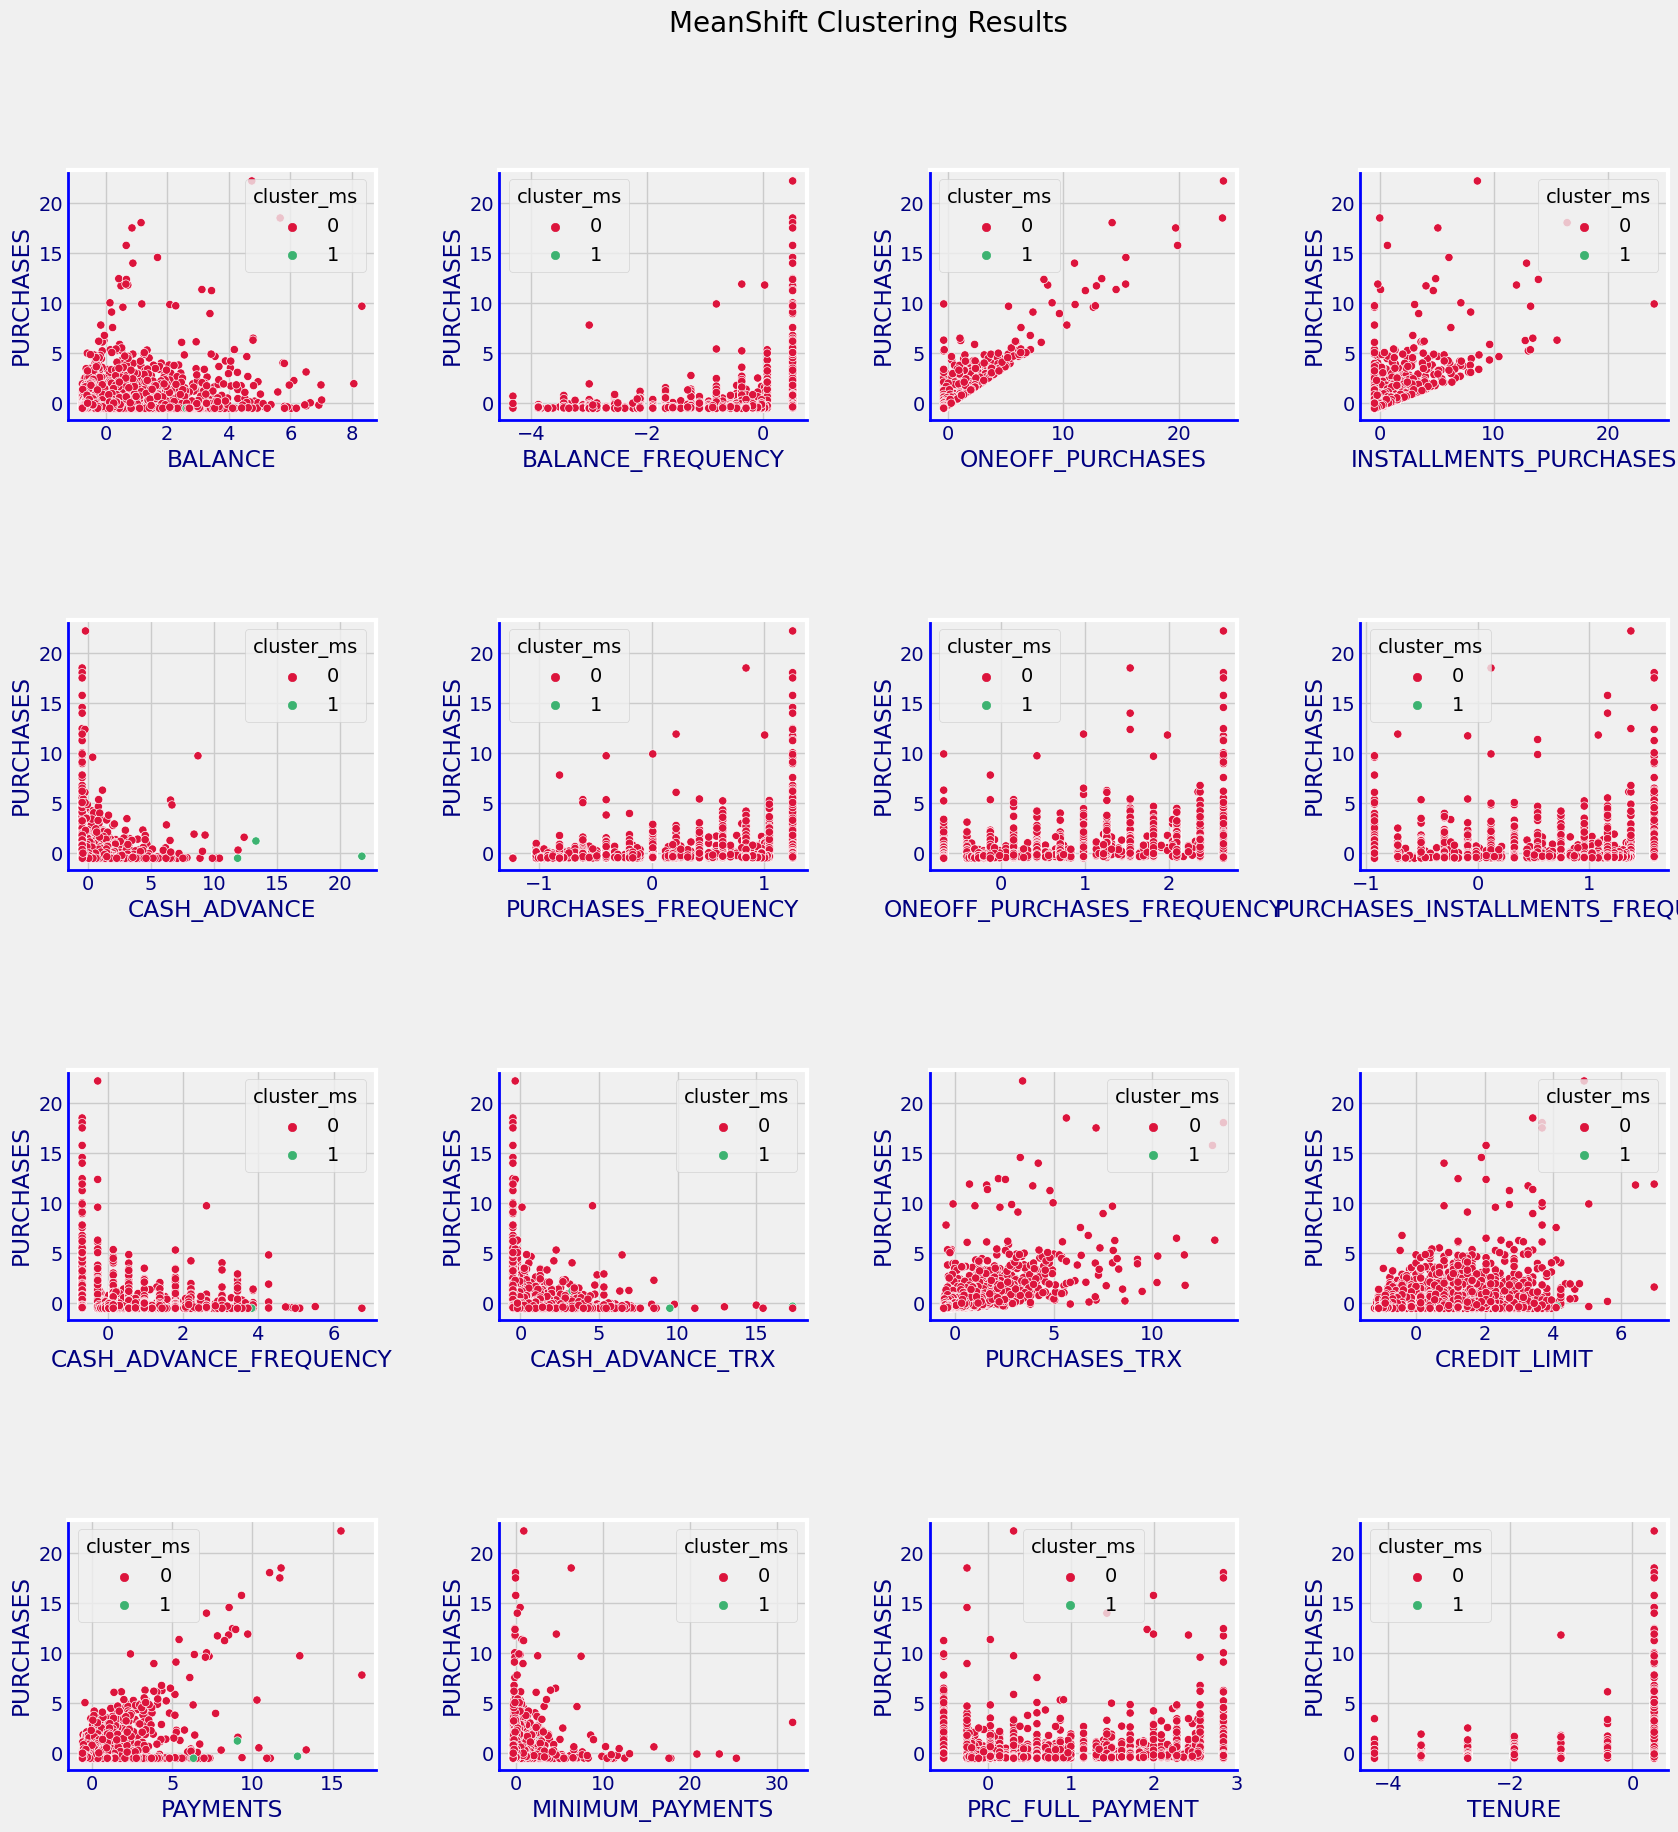

In [184]:
# Ensure scaled_data is a DataFrame with the same column names as df
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)

# Step 1: Labeling
ms = MeanShift(bandwidth=14, bin_seeding=False,n_jobs = -1)  # Select the best from the previous code!
labels_ms = ms.fit_predict(scaled_data)
df5 = pd.concat([scaled_data, pd.DataFrame({'cluster_ms': labels_ms})], axis=1)

# Step 2: Subplot
col_names = ['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES',
             'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
             'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
             'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
             'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
             'TENURE']

plt.figure(figsize=(20, 20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)
palette1 = ["crimson", "MediumSeaGreen", "gold"]

for j, col in enumerate(col_names):
    plt.subplot(4, 4, j+1)
    ax = sns.scatterplot(x=col, y='PURCHASES', hue='cluster_ms', data=df5, palette=palette1)
    ax.spines['bottom'].set_color('blue')
    ax.spines['top'].set_color('white') 
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_color('blue')
    ax.xaxis.label.set_color('navy')
    ax.yaxis.label.set_color('navy')
    ax.tick_params(colors="navy", which='both')  # 'both' refers to minor and major axes

plt.suptitle('MeanShift Clustering Results', fontsize=20)
plt.show()


It did not cluster!!

In [ ]:
                                                          # 5. MiniBatchKMeans

In [186]:
# Define the parameter grid to search
param_grid = {
    'n_clusters': range(2, 10),  # Adjust the range of n_clusters as needed
    'init': ['k-means++', 'random'],
    'max_iter': [100, 200, 300],
    'batch_size': [100, 200, 300],
    'tol': [1e-4, 1e-3, 1e-2]
}

results = []

# Perform grid search manually
for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for max_iter in param_grid['max_iter']:
            for batch_size in param_grid['batch_size']:
                for tol in param_grid['tol']:
                    mbk = MiniBatchKMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, batch_size=batch_size, tol=tol)
                    labels = mbk.fit_predict(scaled_data)
                    
                    # Check the number of unique clusters
                    if len(set(labels)) > 1:
                        S_score = silhouette_score(scaled_data, labels)
                        C_score = calinski_harabasz_score(scaled_data, labels)
                        D_score = davies_bouldin_score(scaled_data, labels)
                        
                        # Append results to the list
                        results.append({
                            'silhouette_score': S_score, 
                            'calinski_harabasz_score': C_score,
                            'davies_bouldin_score': D_score,
                            'n_clusters': n_clusters,
                            'init': init,
                            'max_iter': max_iter,
                            'batch_size': batch_size,
                            'tol': tol
                        })
                    else:
                        print(f"Skipping n_clusters={n_clusters}, init={init}, max_iter={max_iter}, batch_size={batch_size}, tol={tol} as it resulted in a single cluster")

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the top 3 results based on silhouette score
print(results_df.nlargest(3, 'silhouette_score'))


    silhouette_score  calinski_harabasz_score  davies_bouldin_score  \
19          0.523001               850.282851              1.547880   
5           0.520549              1257.918379              1.317363   
16          0.410612              1443.517219              1.557792   

    n_clusters       init  max_iter  batch_size    tol  
19           2  k-means++       300         100  0.001  
5            2  k-means++       100         200  0.010  
16           2  k-means++       200         300  0.001  


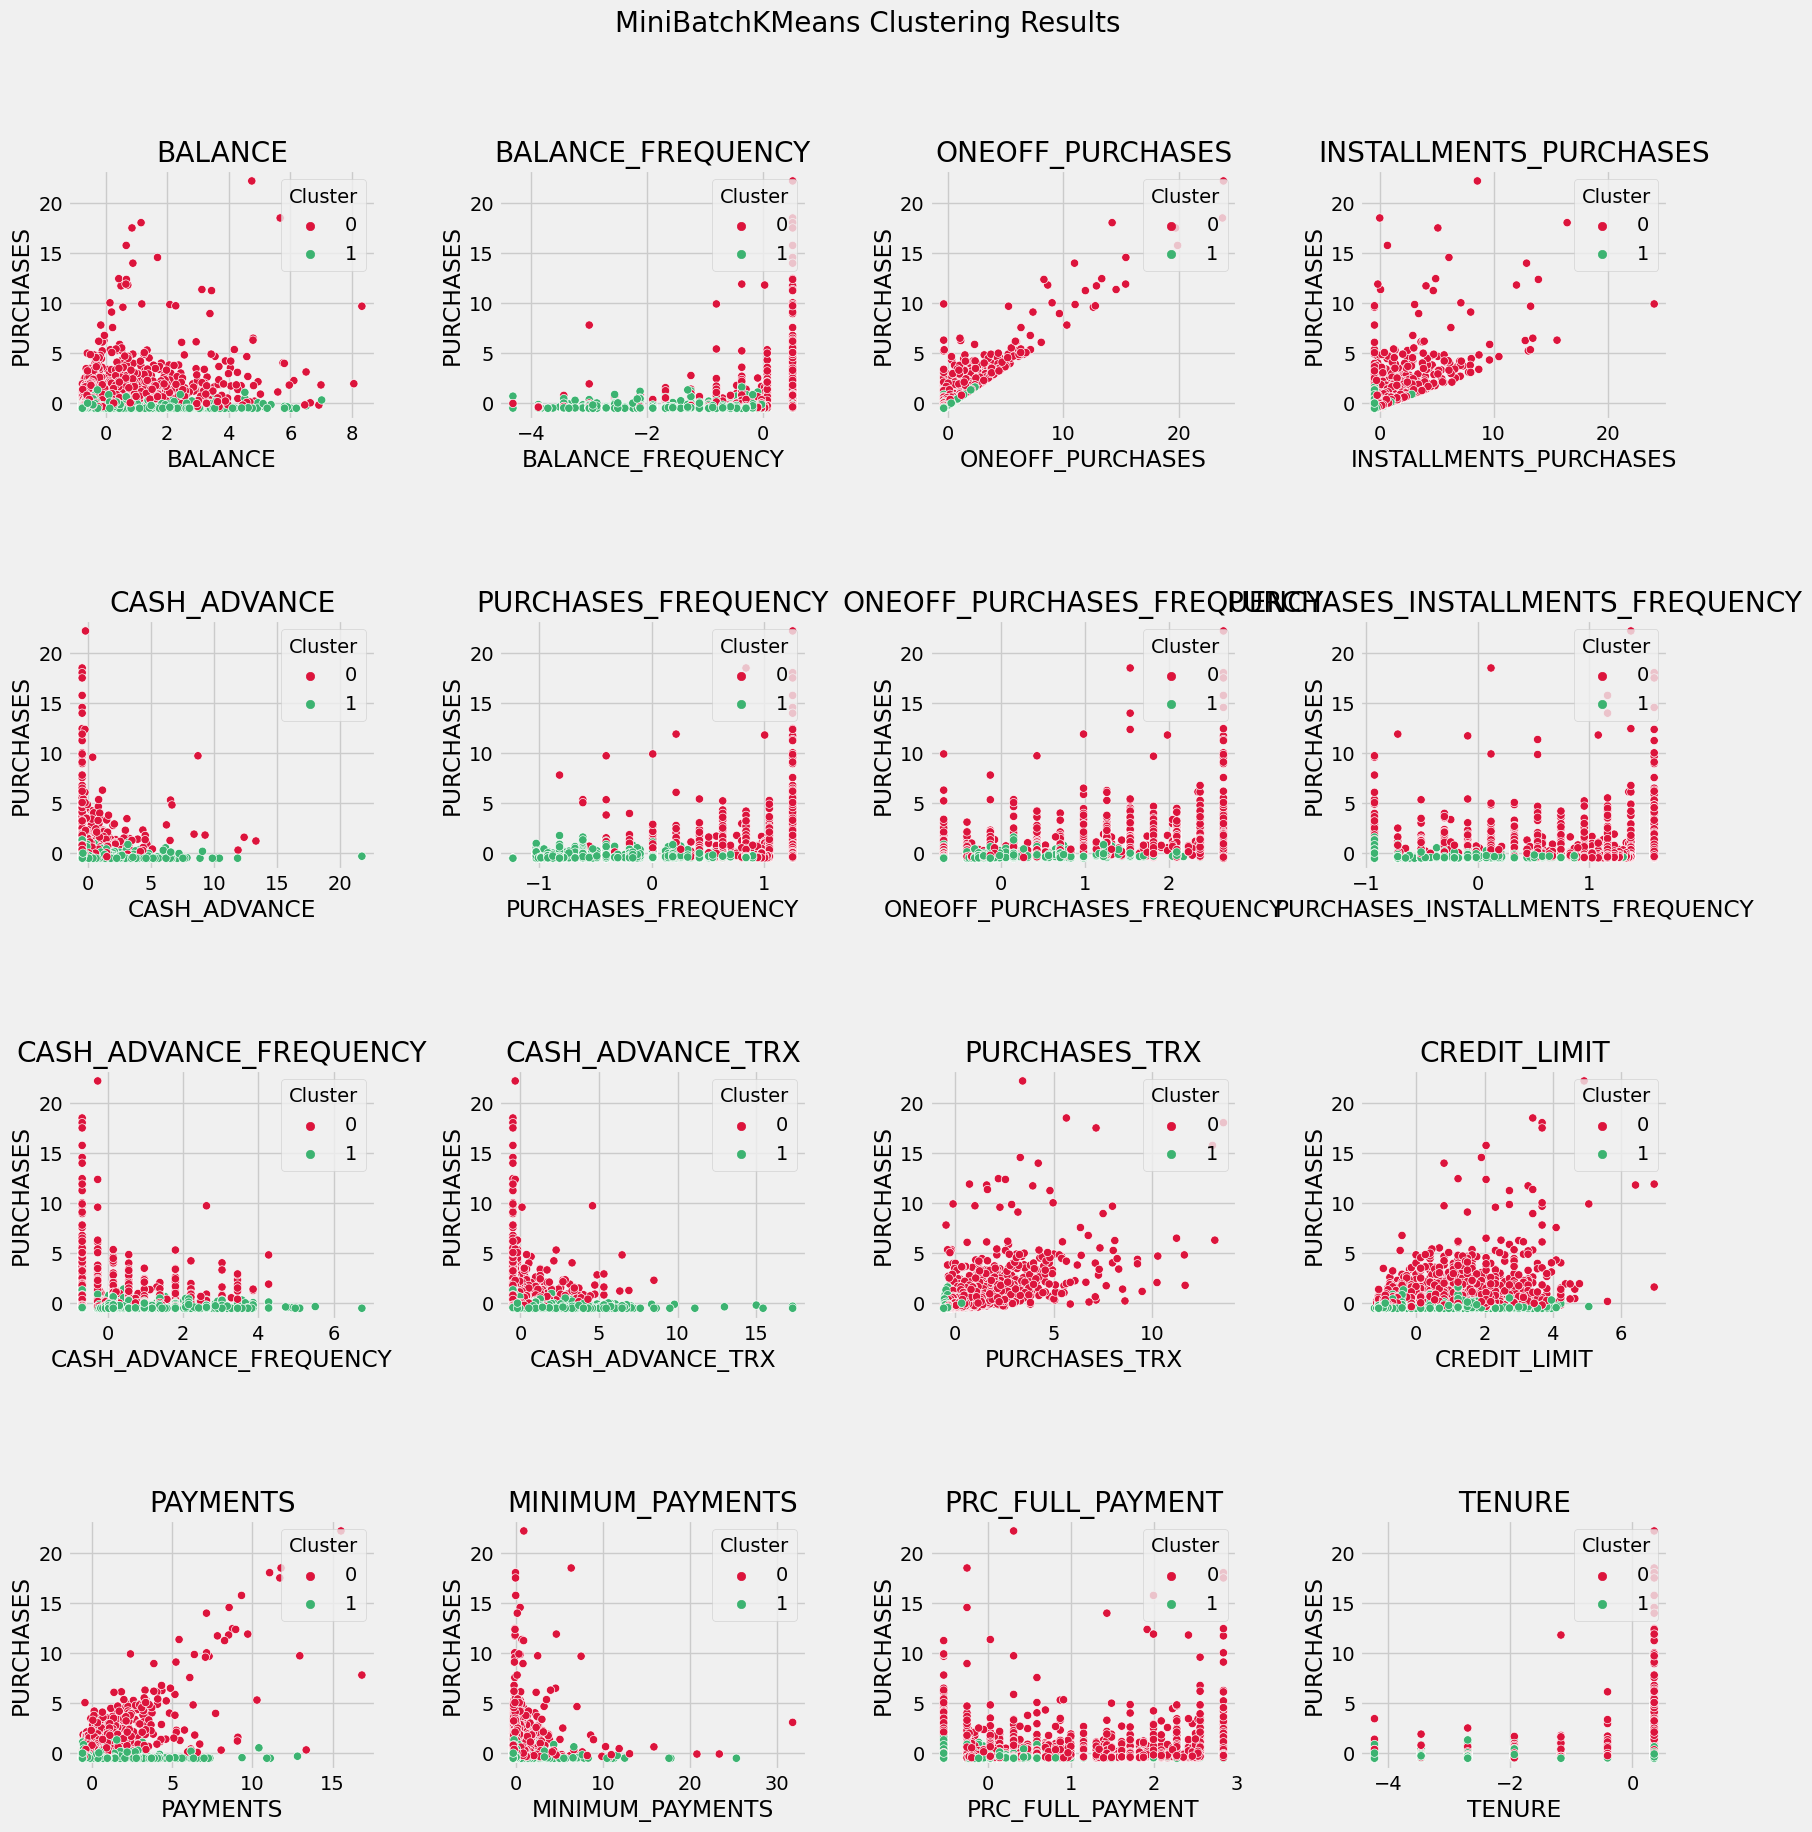

In [187]:

# Ensure scaled_data is a DataFrame with the same column names as df
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)

# Perform MiniBatchKMeans clustering with chosen parameters (adjust as needed)
mbk = MiniBatchKMeans(n_clusters=2, init='k-means++', max_iter=200, batch_size=300, tol=0.0010)
labels = mbk.fit_predict(scaled_data)
scaled_data['cluster'] = labels  # Add cluster labels to the scaled_data DataFrame

# Define the column names for the subplots
col_names = ['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES',
             'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
             'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
             'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
             'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
             'TENURE']

# Create subplots
plt.figure(figsize=(20, 20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)
palette1 = ["crimson", "MediumSeaGreen", "gold", "blue", "purple"]

for i, col in enumerate(col_names):
    plt.subplot(4, 4, i+1)
    sns.scatterplot(x=scaled_data[col], y=scaled_data['PURCHASES'], hue=scaled_data['cluster'], palette=palette1)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PURCHASES')
    plt.legend(loc='upper right', title='Cluster')

plt.suptitle('MiniBatchKMeans Clustering Results', fontsize=20)
plt.show()


In [ ]:
                                              # 6. GaussianMixture

In [198]:


results=[]
# Scale Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
param_grid = {
    'n_components': range(2, 6),  # Number of clusters
    'covariance_type': ['spherical', 'tied', 'diag', 'full'],  # Type of covariance
    'init_params': ['kmeans', 'random'],  # Initialization method
    'max_iter': [100, 200, 300]  # Number of iterations
}
for n_components in range(2, 10):
    for covariance_type in param_grid['covariance_type']:
        for init_params in param_grid['init_params']:
            for max_iter in param_grid['max_iter']:
                
                gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, 
                                      init_params=init_params, max_iter=max_iter, random_state=42)
                gmm.fit(scaled_data)
                labels = gmm.fit_predict(scaled_data)
                # Check the number of unique clusters
                if len(set(labels)) > 1:
                        S_score = silhouette_score(scaled_data, labels)
                        C_score = calinski_harabasz_score(scaled_data, labels)
                        D_score = davies_bouldin_score(scaled_data, labels)
                        
                        # Append results to the list
                        results.append({
                            'silhouette_score': S_score, 
                            'calinski_harabasz_score': C_score,
                            'davies_bouldin_score': D_score,
                            'n_clusters': n_components,
                            'init': init,
                            'max_iter': max_iter,
                            'covariance_type':covariance_type
                           
                          
                        })
                else:
                        print(f"Skipping n_clusters={n_clusters}, init={init}, max_iter={max_iter}, batch_size={batch_size}, tol={tol} as it resulted in a single cluster")


results_df=pd.DataFrame(results)
results_df




silhouette_score  calinski_harabasz_score  davies_bouldin_score  \
0            0.320202              1471.004144              2.198487   
1            0.320202              1471.004144              2.198487   
2            0.320202              1471.004144              2.198487   
3            0.320202              1471.004144              2.198487   
4            0.320202              1471.004144              2.198487   
..                ...                      ...                   ...   
187          0.063387               611.702568              3.184890   
188          0.063387               611.702568              3.184890   
189          0.041078               477.424446              3.200631   
190          0.041078               477.424446              3.200631   
191          0.041078               477.424446              3.200631   

     n_clusters    init  max_iter covariance_type  
0             2  random       100       spherical  
1             2  random       200       spherical  
2             2  random       300       spherical  
3             2  random       100       spherical  
4             2  random       200       spherical  
..          ...     ...       ...             ...  
187           9  random       200            full  
188           9  random       300            full  
189           9  random       100            full  
190           9  random       200            full  
191           9  random       300            full  

[192 rows x 7 columns]

In [199]:
print(results_df.nlargest(3,  'silhouette_score'))

    silhouette_score  calinski_harabasz_score  davies_bouldin_score  \
18          0.341072              1603.087923              2.035631   
19          0.341072              1603.087923              2.035631   
20          0.341072              1603.087923              2.035631   

    n_clusters    init  max_iter covariance_type  
18           2  random       100            full  
19           2  random       200            full  
20           2  random       300            full  


Silhouette Score: 0.2353672687213193
Calinski-Harabasz Score: 1220.7365548832836
Davies-Bouldin Score: 2.3749762052436236


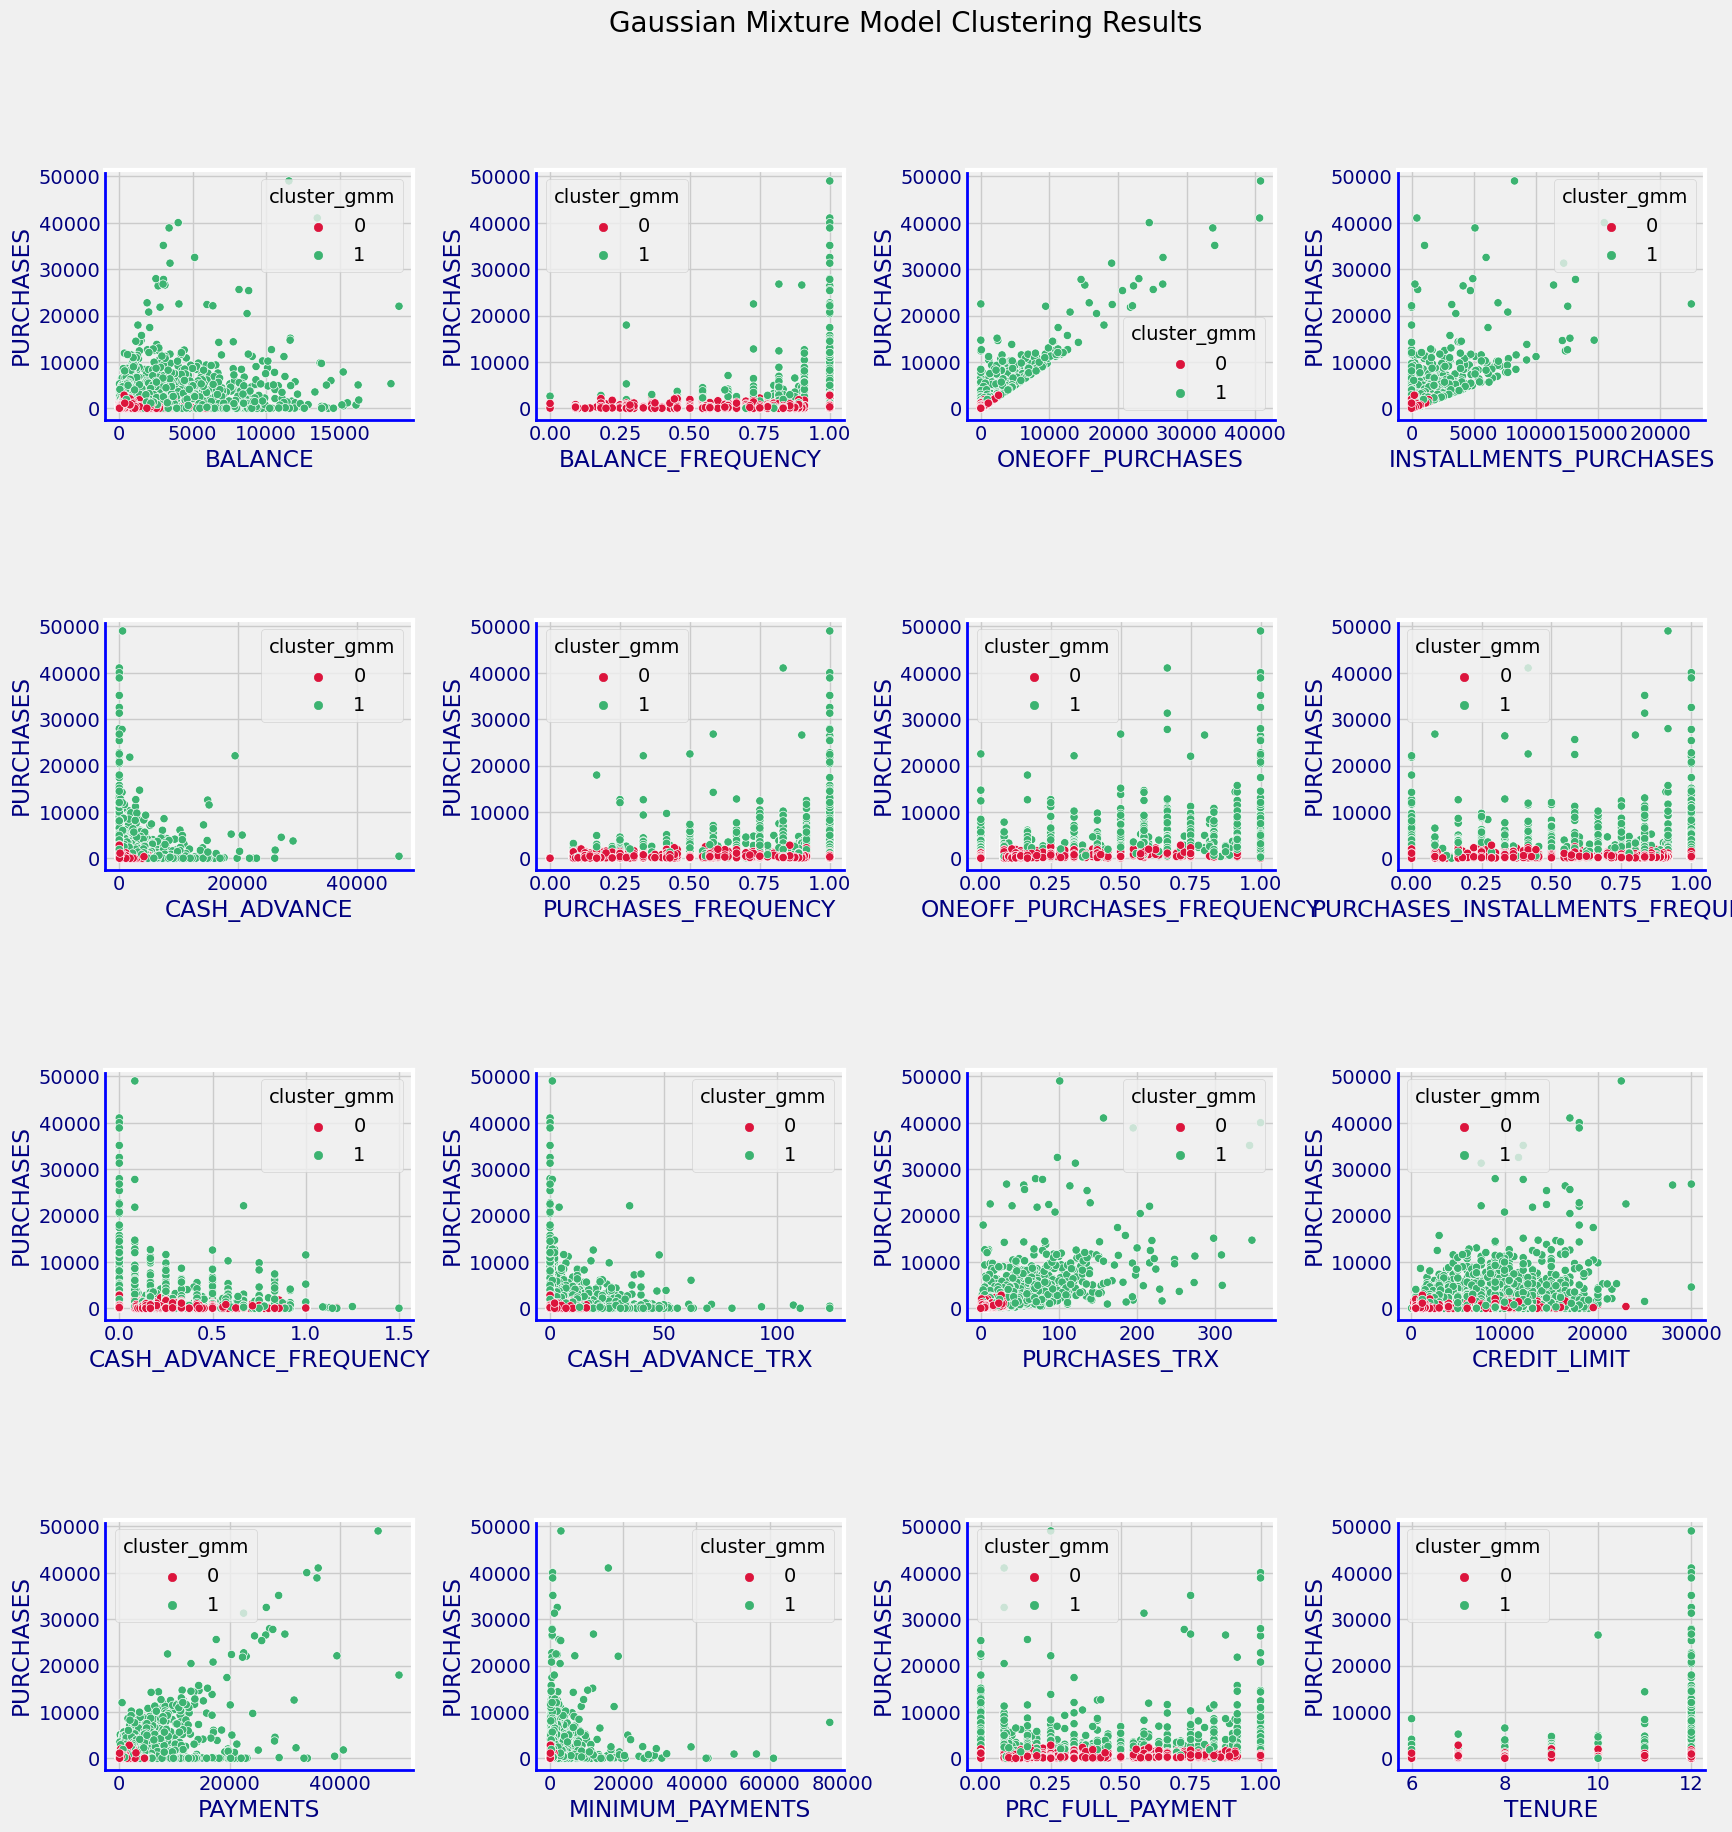

In [204]:

 gmm = GaussianMixture(n_components=2, covariance_type='full', 
                                      init_params='random', max_iter=100, random_state=42)
gmm.fit(scaled_data)
labels_gmm = gmm.fit_predict(scaled_data)




# Evaluate Model
S_score = silhouette_score(scaled_data, labels_gmm)
C_score = calinski_harabasz_score(scaled_data, labels_gmm)
D_score = davies_bouldin_score(scaled_data, labels_gmm)

print(f'Silhouette Score: {S_score}')
print(f'Calinski-Harabasz Score: {C_score}')
print(f'Davies-Bouldin Score: {D_score}')

# Add the labels to your DataFrame for plotting
df['cluster_gmm'] = labels_gmm

# Plot Results
col_names = ['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES',
             'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
             'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
             'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
             'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
             'TENURE']

plt.figure(figsize=(20, 20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)
palette1 = ["crimson", "MediumSeaGreen", "gold"]

for j, col in enumerate(col_names):
    plt.subplot(4, 4, j+1)
    ax = sns.scatterplot(x=col, y='PURCHASES', hue='cluster_gmm', data=df, palette=palette1)
    ax.spines['bottom'].set_color('blue')
    ax.spines['top'].set_color('white') 
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_color('blue')
    ax.xaxis.label.set_color('navy')
    ax.yaxis.label.set_color('navy')
    ax.tick_params(colors="navy", which='both')  # 'both' refers to minor and major axes

plt.suptitle('Gaussian Mixture Model Clustering Results', fontsize=20)
plt.show()



In [ ]:
                                                       # Conclusion

In [213]:
Conclusion_table={'Algorithms':['K_KMeans', 'Agglomerative Clustering', 'DBSCAN', 'MeanShift','MiniBatchKMeans','GaussianMixture'],
                  'n_clusters':[3, 3,2,2,2,2],
                  'silhouette':[0.2480, 0.835953,0.746697,0.772976, 0.523001, 0.341072]
    
}

# Convert the dictionary to a DataFrame
df_conclusion = pd.DataFrame(Conclusion_table)

# Display the DataFrame
df_conclusion

Algorithms  n_clusters  silhouette
0                  K_KMeans           3    0.248000
1  Agglomerative Clustering           3    0.835953
2                    DBSCAN           2    0.746697
3                 MeanShift           2    0.772976
4           MiniBatchKMeans           2    0.523001
5           GaussianMixture           2    0.341072

Then, Agglomerative Clustering provide the highest silhouette_Score with 3 clusters.